In [1]:
# This is the home page of the competition. Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Input variables: # bank client data:

# 1 - age (numeric)

# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

# 5 - default: has credit in default? (categorical: 'no','yes','unknown')

# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')

# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# 8 - contact: contact communication type (categorical: 'cellular','telephone')

# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

# 10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# # other attributes:

# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

# 14 - previous: number of contacts performed before this campaign and for this client (numeric)

# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Output variable (desired target):

# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
# Model evalustion metric is AUC score

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,roc_curve,classification_report,recall_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [ ]:
# Process from data loading to the model building and the result
# 1)Analyse the columns number and the row numbers
#2) Perform EDA through data visuilization and finding the rel;ation of columns to the target
# 3) Performed Statiscal tests to test the relation of independent variable to target variable
# 4)Transform the data in order to normalize the data
# 5)Perform the model building by spilliting the data into tests and train in 20:80 ratio
# 6) Analyse the model performance and decide the best model


In [3]:
df2=pd.read_csv('Train bank.csv')

In [4]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# printing no of rows and columns
df2.shape
print('Row',df2.shape[0])
print('columns', df2.shape[1])

Row 4521
columns 17


In [6]:
df2.describe() # 5 point summary

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df2.info() # in order to identify the datatype and null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df2.drop_duplicates(keep='first', inplace=True)

In [9]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
for i in df2.columns:
  print(i,'----', df2[i].unique())
  print('-----------------------------------------------------------------------------------------------')

age ---- [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
-----------------------------------------------------------------------------------------------
job ---- ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
-----------------------------------------------------------------------------------------------
marital ---- ['married' 'single' 'divorced']
-----------------------------------------------------------------------------------------------
education ---- ['primary' 'secondary' 'tertiary' 'unknown']
-----------------------------------------------------------------------------------------------
default ---- ['no' 'yes']
-----------------------------------------------------------------------------------------------
balance ---- [ 1

In [11]:
df2['y'].value_counts(normalize=True) # to check the imbalance data

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [12]:
df2.rename(columns={'y':'churn'},inplace=True) # since the problem statement deals with churn so here we identify as per data whether customer will subscribe the term deposit service 
# and thus we model it to have churn instead of y depicting whether the client will leave the service of company denoted with yes and whether the client continued with the service of the company denoted 
# with churn no

In [13]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [14]:
# univariate and bivariate analysis
num=df2.select_dtypes(include=np.number)

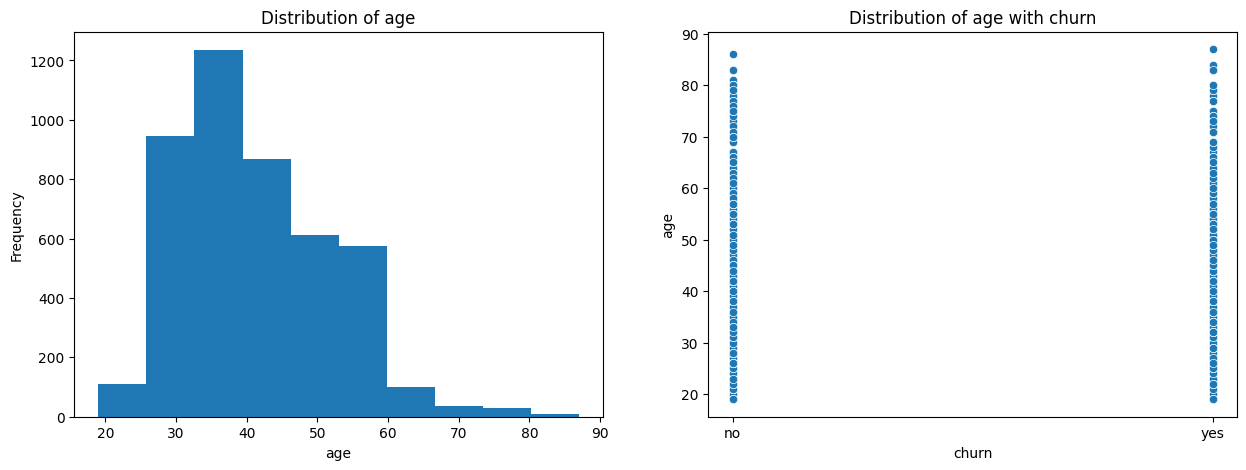

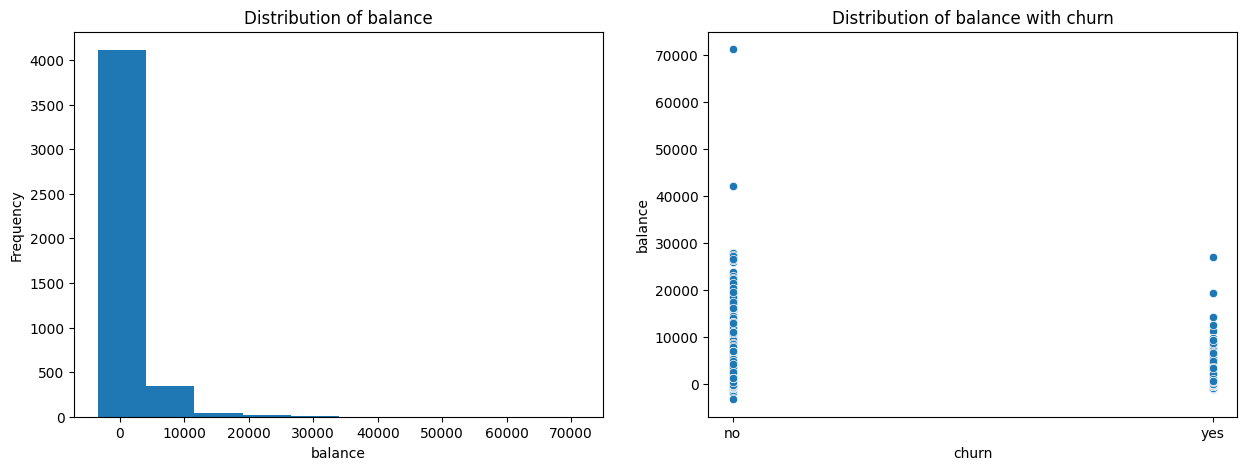

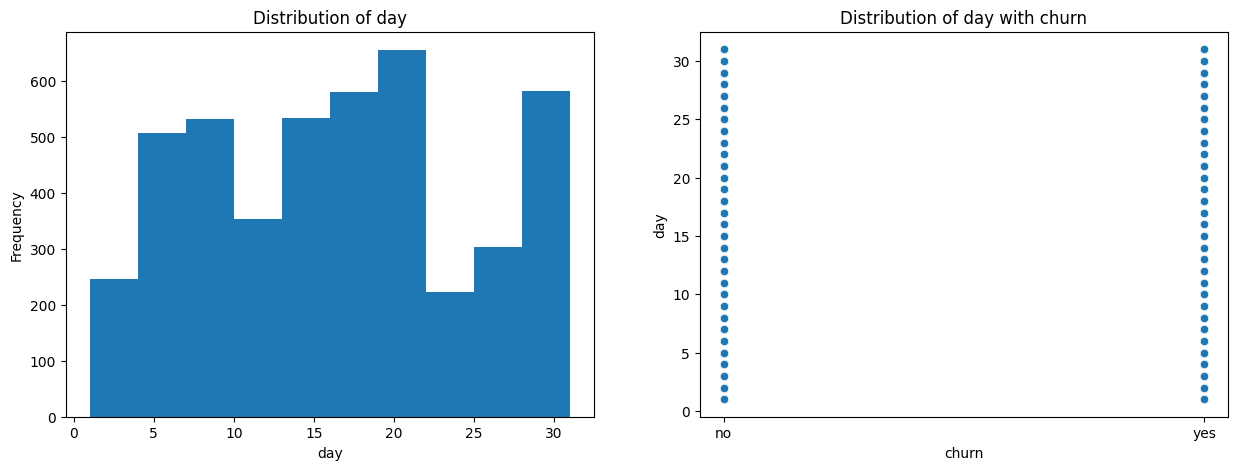

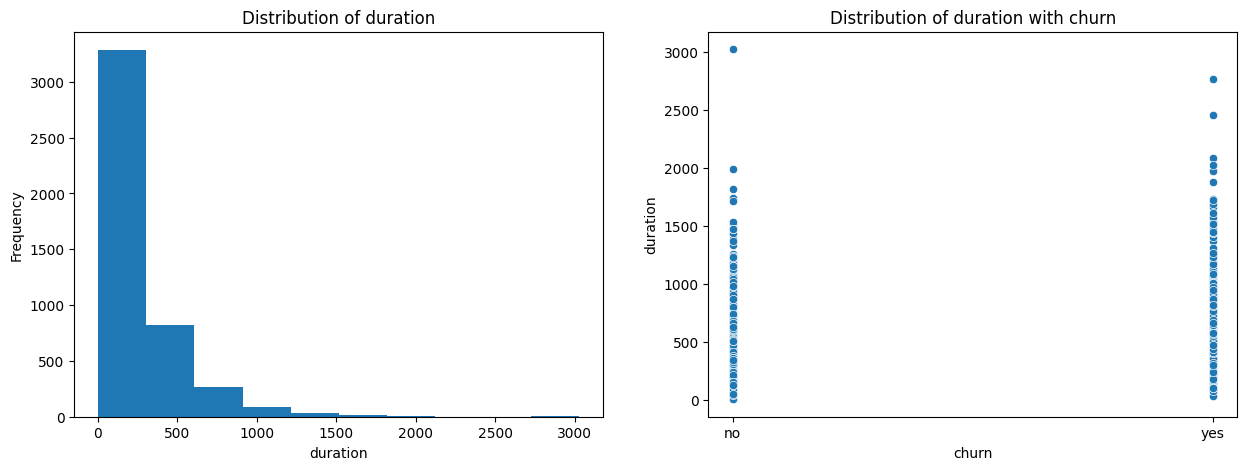

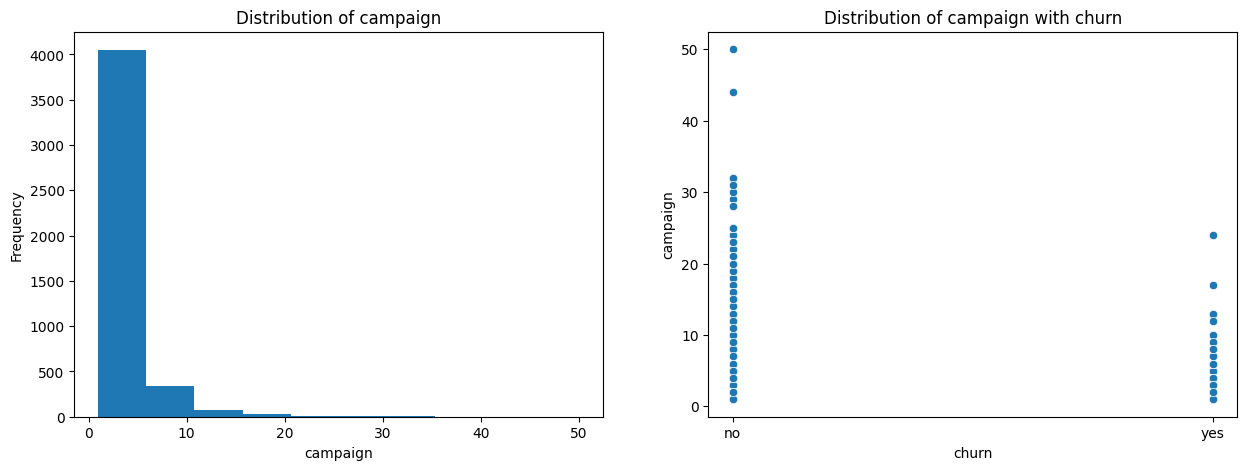

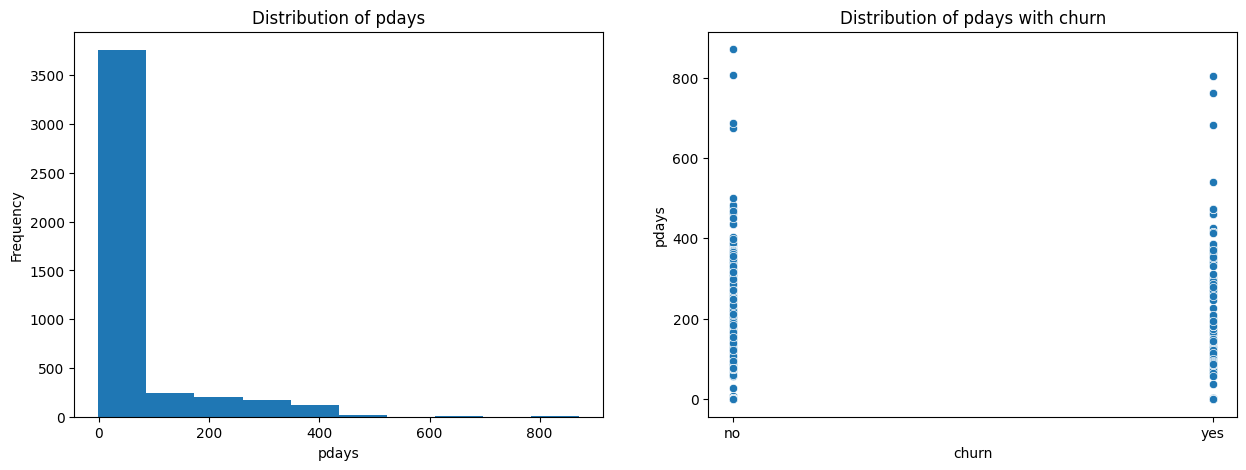

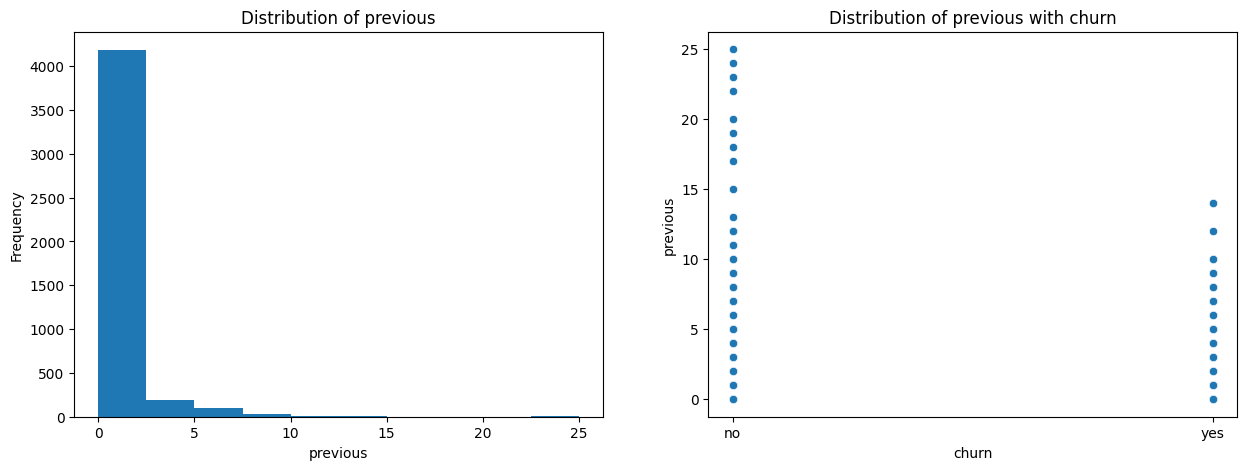

In [15]:
for i in num:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.hist(df2[i])
  plt.ylabel('Frequency')
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  plt.subplot(1,2,2)
  sns.scatterplot(x=df2['churn'],y=df2[i])
  plt.title(f'Distribution of {i} with churn')




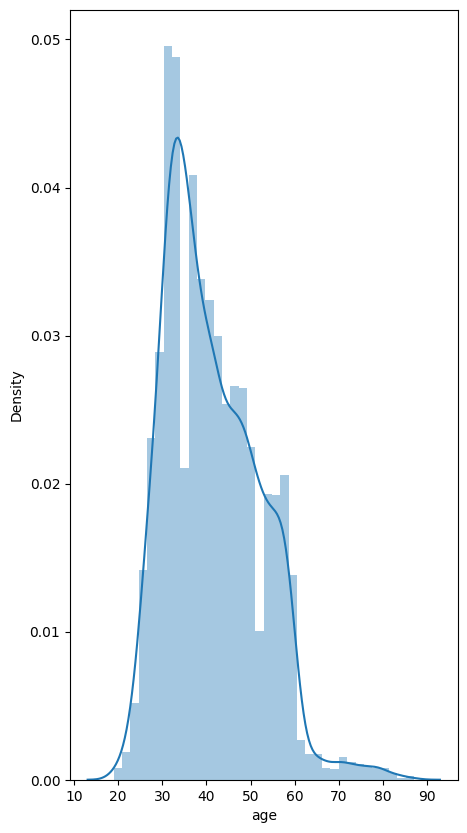

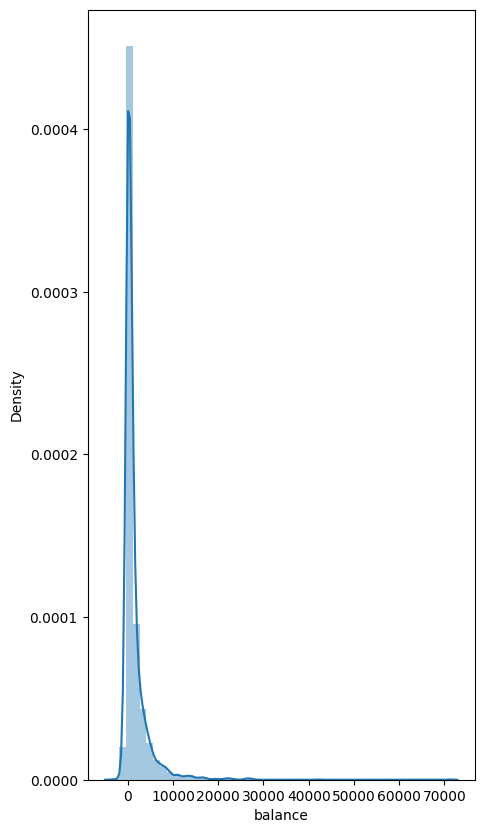

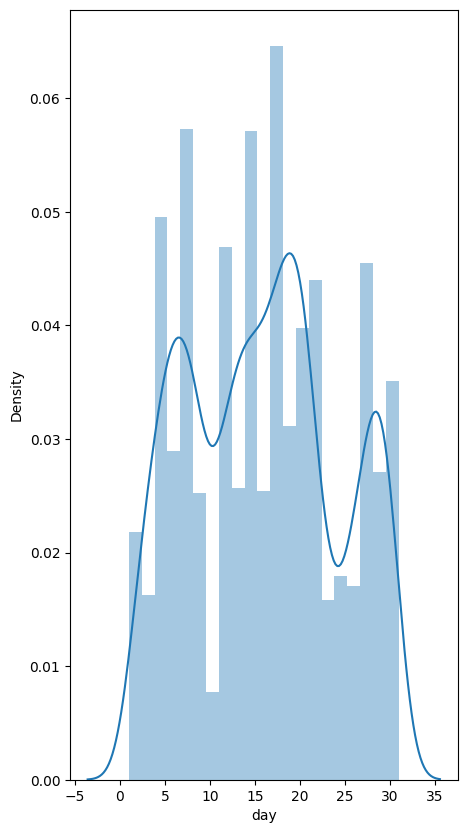

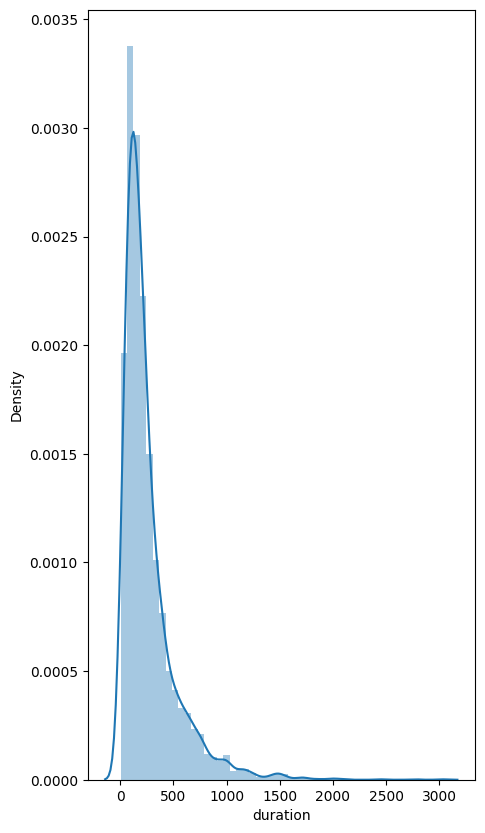

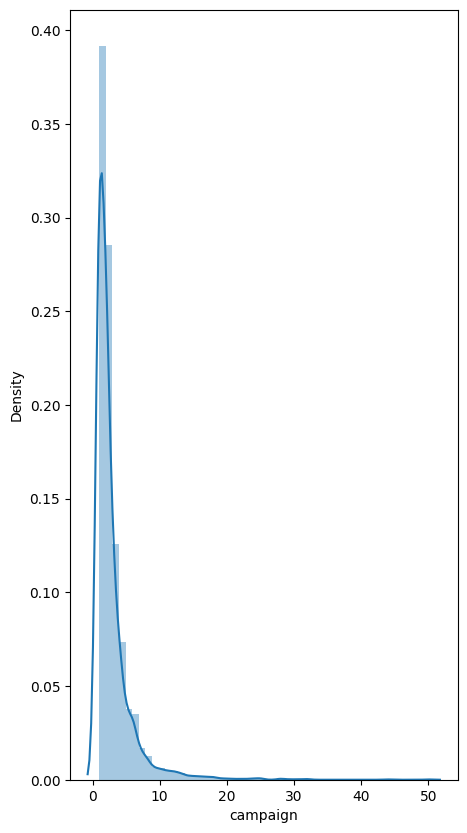

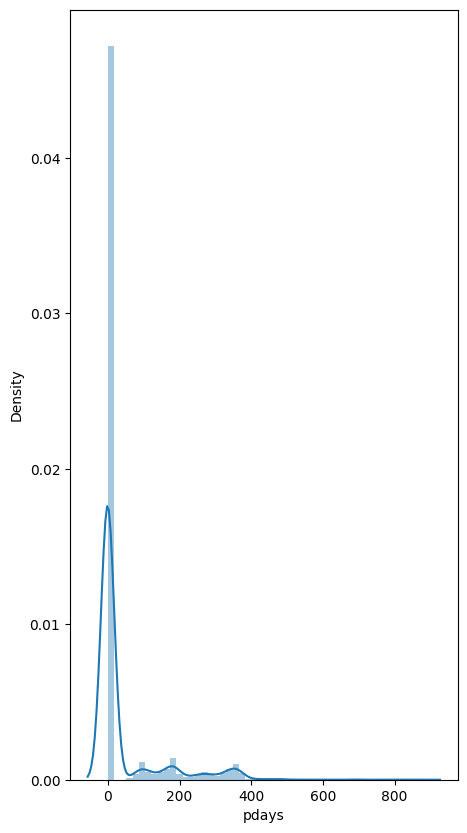

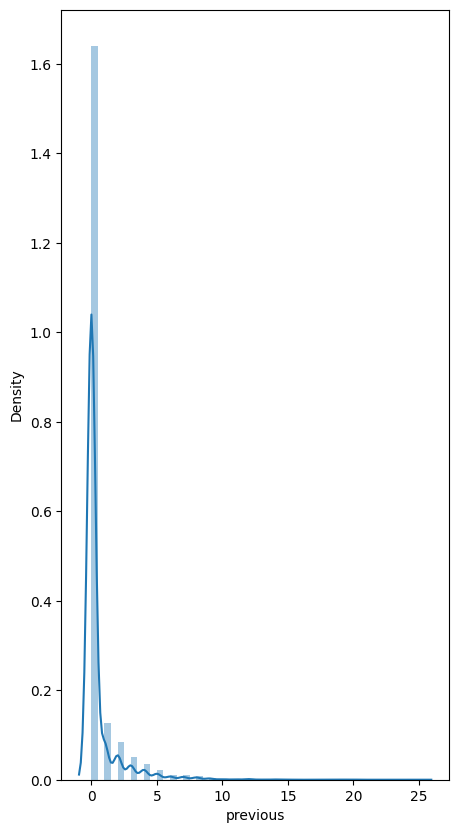

In [16]:
for i in num:
  plt.figure(figsize=(5,10))
  sns.distplot(x=df2[i])
  plt.xlabel(i)

In [17]:
# From the distribution plot that only age and days distribution is nearly normal but for rest of the features like duration, balance, campaign, pdays, previous having 
# positively skewed that which is also confirmed by boxplot

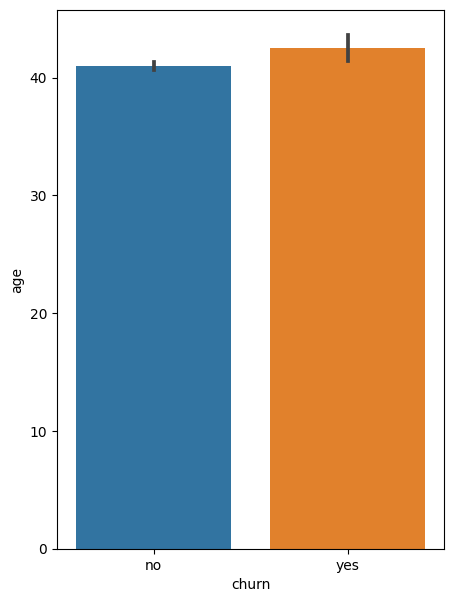

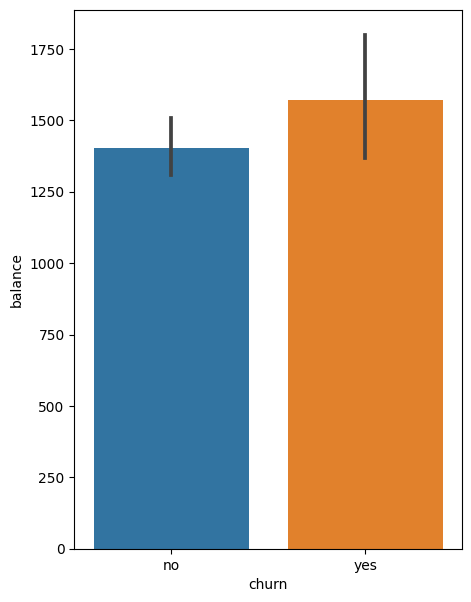

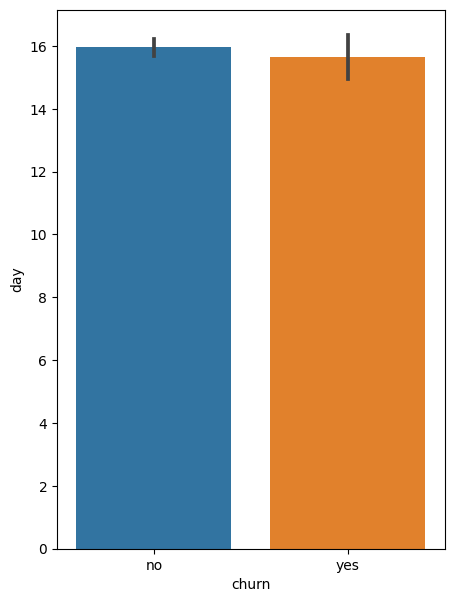

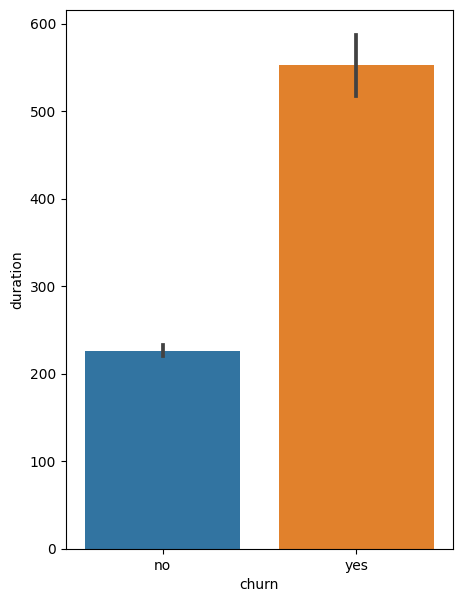

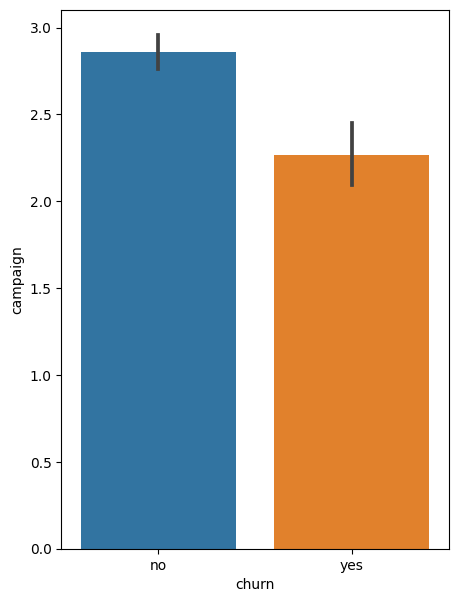

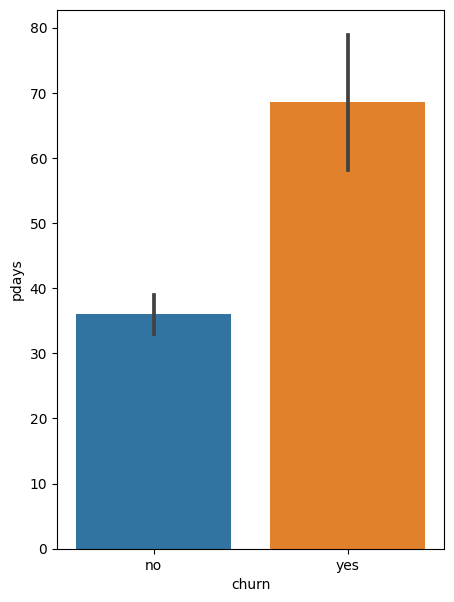

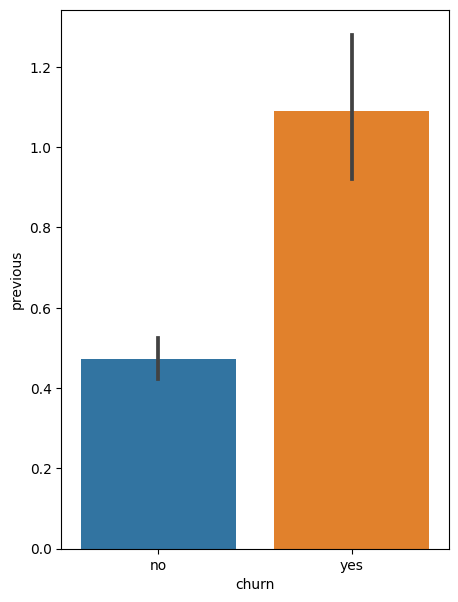

In [18]:
for i in num:
  plt.figure(figsize=(5,7))
  sns.barplot(x=df2['churn'], y=df2[i])

In [19]:
#1) clients with the age group involved in churning are more aged than the clients who didn't churn
#2) Client who churned has given more duration of phone call as compared to the clients who didn't churned
#3)Clients who churned has balance more than the retained clients
#4)Retained clients are more in number whose balance are in negative leading to overall decrease in the mean balance of the retained clients
#5) Day is not a governing factor whether the client will churn or not. 
#6) Duration of the clients are more who churned the company services than the other who retained with the services of the company which is genuine as company may taking feedback from
#  or guiding them with other policies or serving after listening to their needs and problems 
#7)During the current campaigning no. of contacts were made  more for the clients who retained as compared to the clients who churned in order to compensate them more with good and new benefitting offers 
#8) There was a large time lag  for the clients to contact again who left the company services when they were last contacted during previous campaining  and for those who continued small time passed in the next contact duration 
# 9) Client churned contacted more number of times  before this campaign which is usual in order to understand their major concerns and reasons for not contuing with the company services and by doing so they can get what are the clients needs
# so that they can offer better services to the retained clients and maintain long relation 

In [20]:
for i in num:
  v=df2.groupby('churn')[i].mean()
  print(v)

churn
no     40.998000
yes    42.491363
Name: age, dtype: float64
churn
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64
churn
no     15.948750
yes    15.658349
Name: day, dtype: float64
churn
no     226.347500
yes    552.742802
Name: duration, dtype: float64
churn
no     2.862250
yes    2.266795
Name: campaign, dtype: float64
churn
no     36.006000
yes    68.639155
Name: pdays, dtype: float64
churn
no     0.471250
yes    1.090211
Name: previous, dtype: float64


In [21]:
cat=df2.select_dtypes(include='object')

In [22]:
cat

,job,marital,education,default,housing,loan,contact,month,poutcome,churn
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


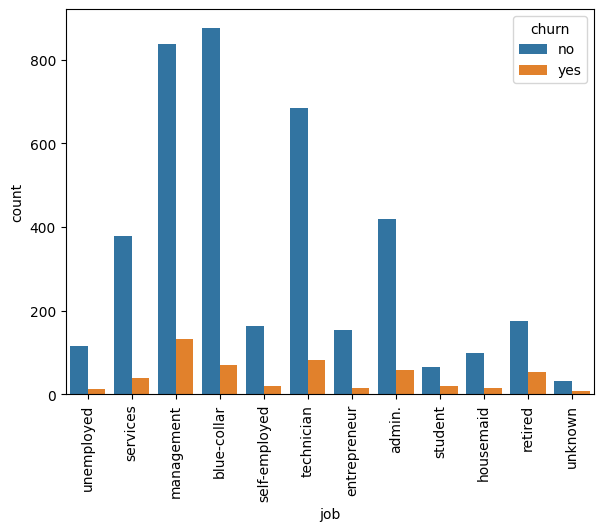

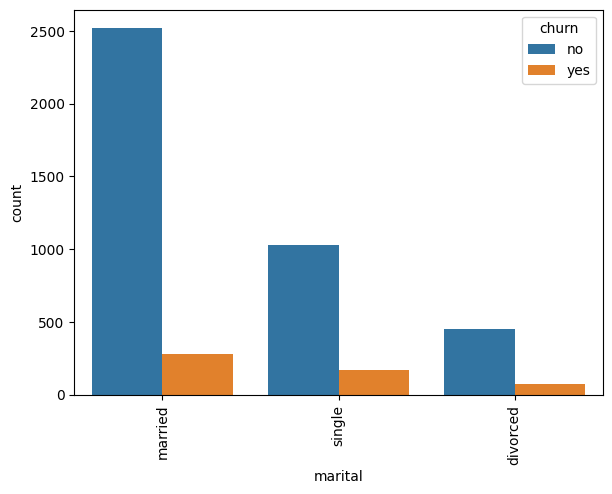

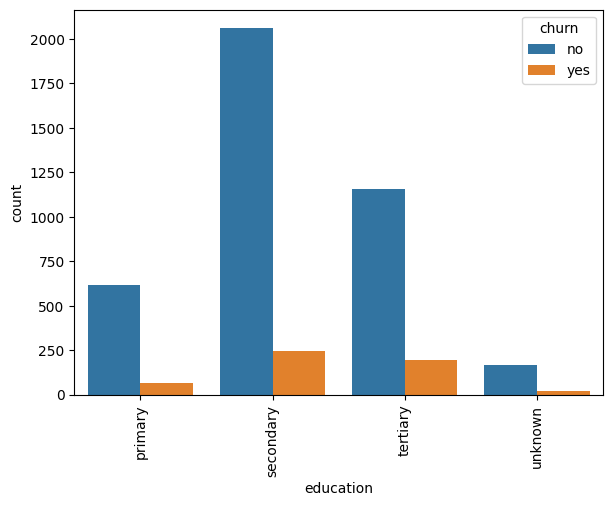

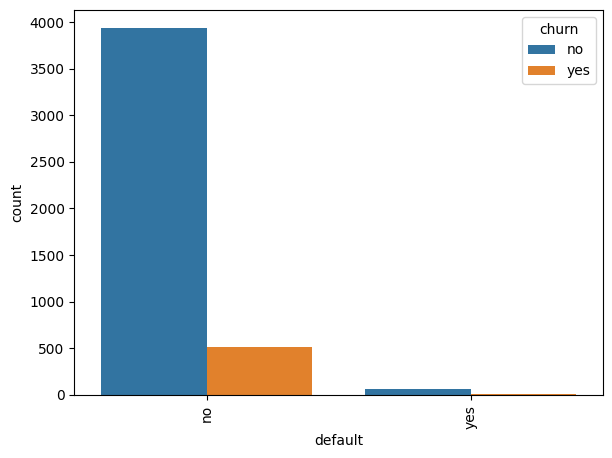

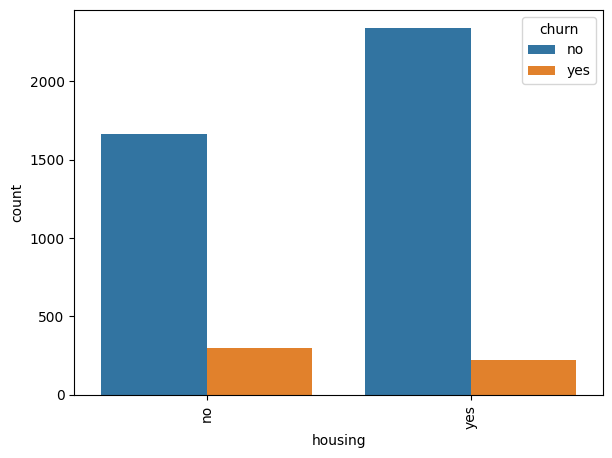

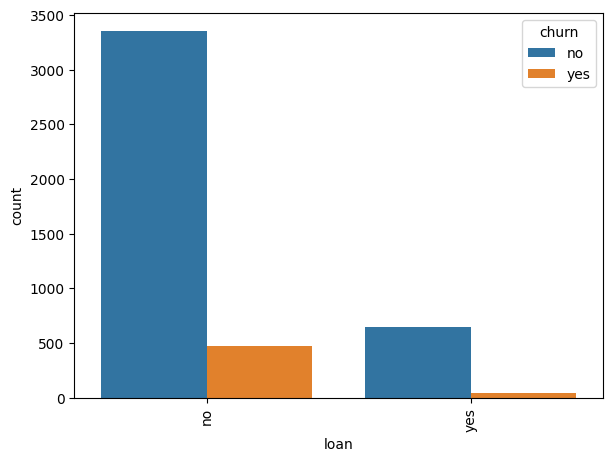

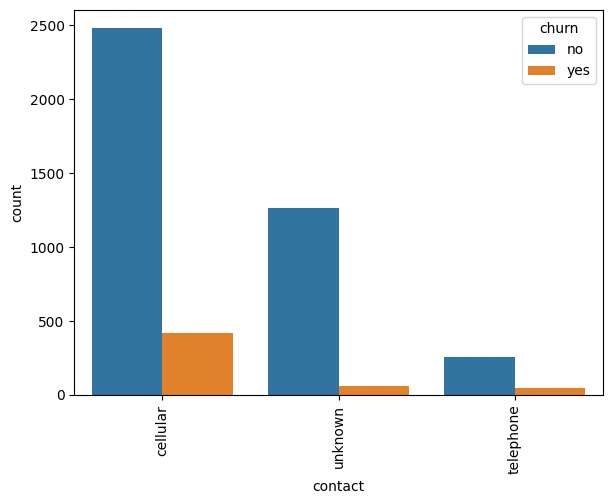

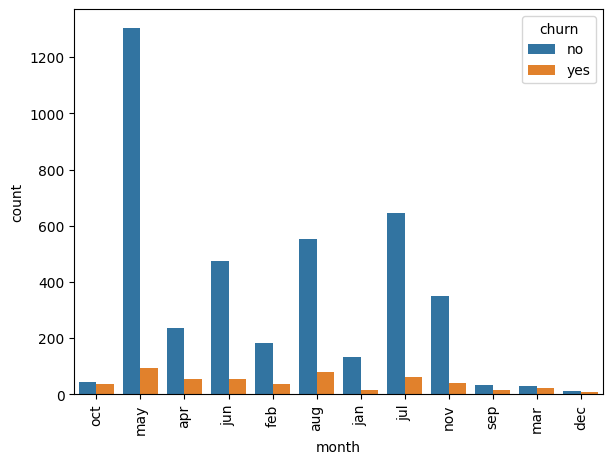

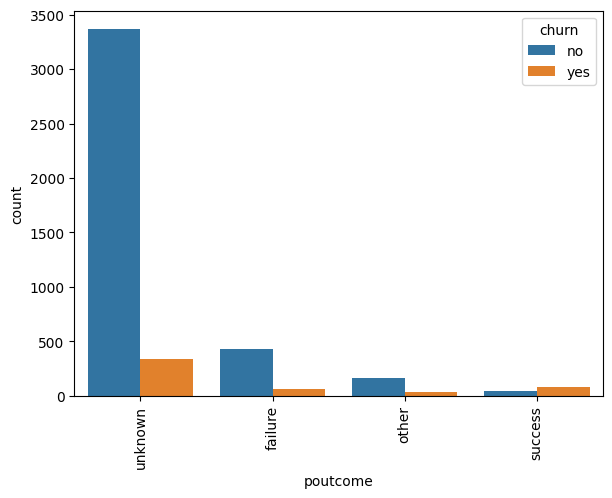

<Figure size 1500x500 with 0 Axes>

In [23]:
for i in cat:
  plt.figure(figsize=(15,5))
  if i!='churn':
    plt.subplot(1,2,1)
    sns.countplot(x=df2[i],hue=df2['churn'])
    plt.xticks(rotation=90)

In [24]:
for i in cat:
  print(i)
  v=print(df2.groupby(i)['churn'].value_counts(normalize=True))

  # obsevation
  # blue-collar employees are the accounts for the least churned clients for the company after that mangement accounts for lesser churning
  # Married ones are less churned clients 
  # clients who have credit obligations has churned the company less in number as compared to who doesn't have loan obligation
  # primary level educated clients has churned less in number as comapred to holders of secondary and teritiary degrees
  # Loan borrower churning less as compare to clients who doesn't record any loan history
  # cellular contact communication holds lesser clients who churned out of the company services than telephonic medium reason could be clearity of communication to clients with paln and everything
  # In summer season retaining clients accounts more than any other month

job
job            churn
admin.         no       0.878661
               yes      0.121339
blue-collar    no       0.927061
               yes      0.072939
entrepreneur   no       0.910714
               yes      0.089286
housemaid      no       0.875000
               yes      0.125000
management     no       0.864809
               yes      0.135191
retired        no       0.765217
               yes      0.234783
self-employed  no       0.890710
               yes      0.109290
services       no       0.908873
               yes      0.091127
student        no       0.773810
               yes      0.226190
technician     no       0.891927
               yes      0.108073
unemployed     no       0.898438
               yes      0.101562
unknown        no       0.815789
               yes      0.184211
Name: churn, dtype: float64
marital
marital   churn
divorced  no       0.854167
          yes      0.145833
married   no       0.900965
          yes      0.099035
single    no       

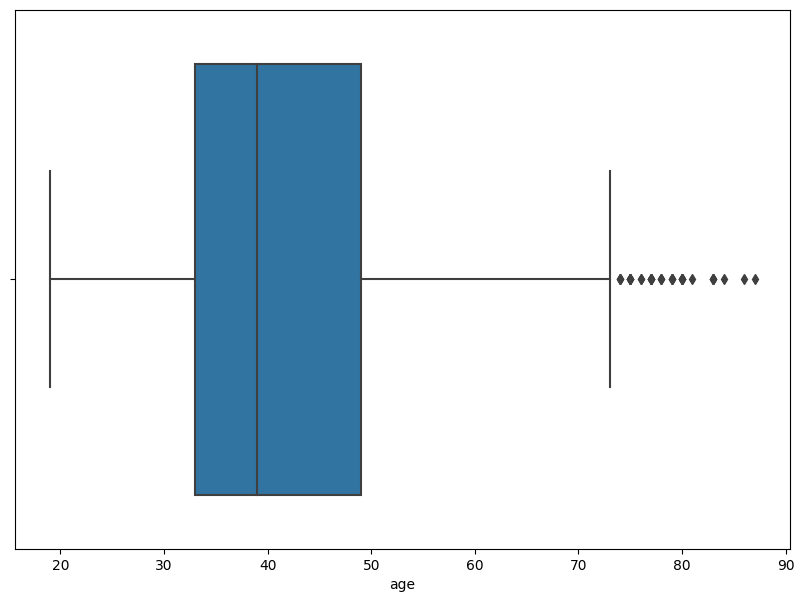

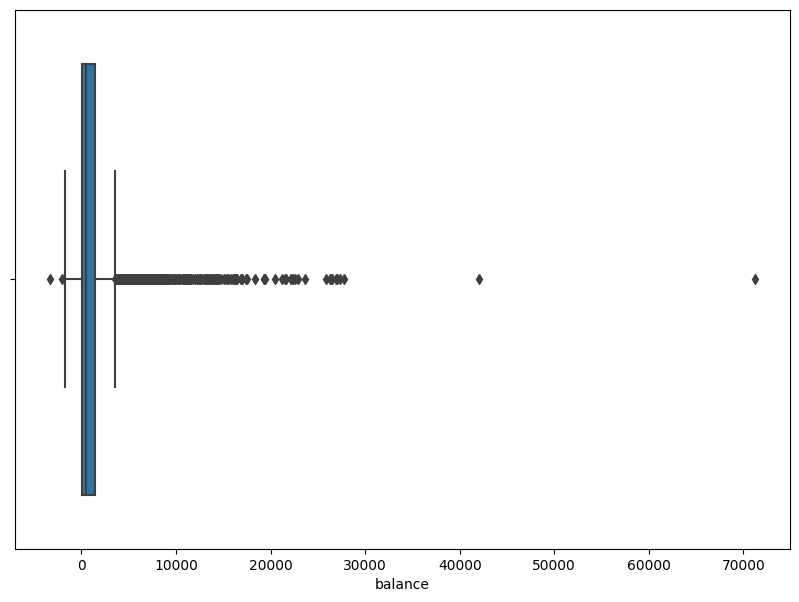

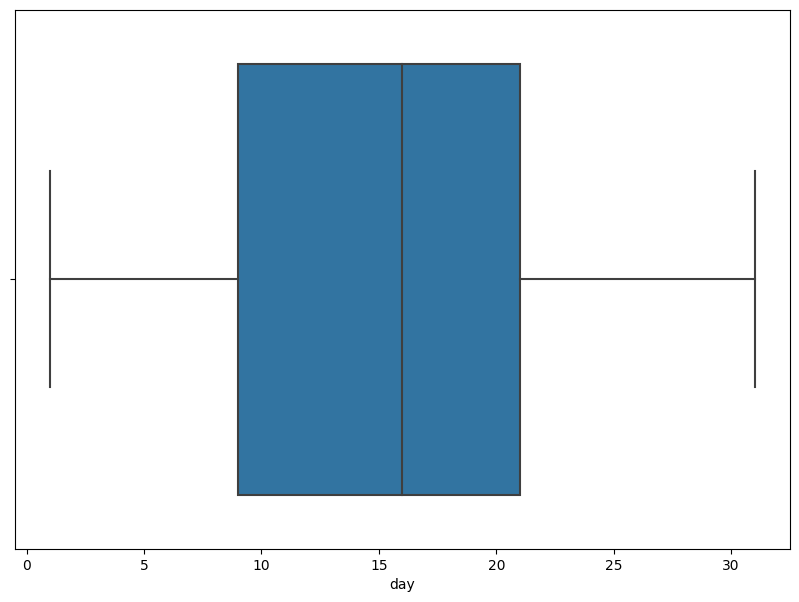

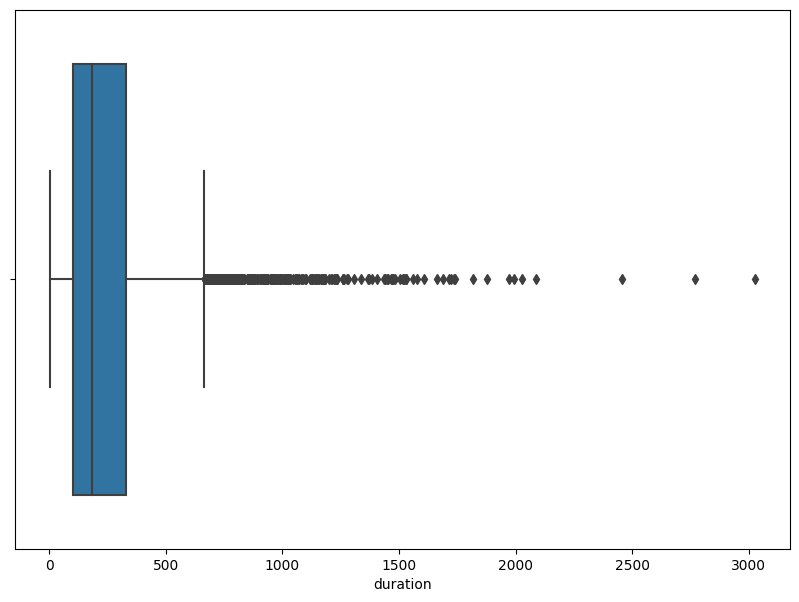

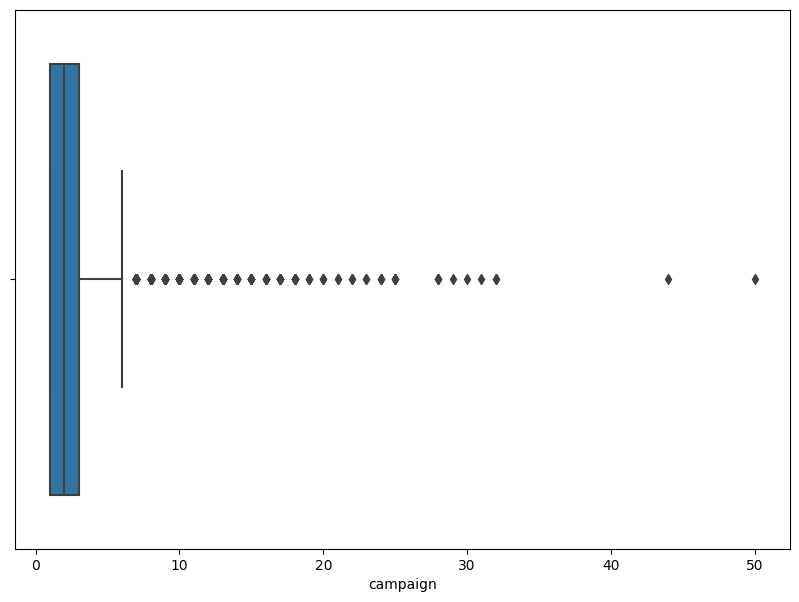

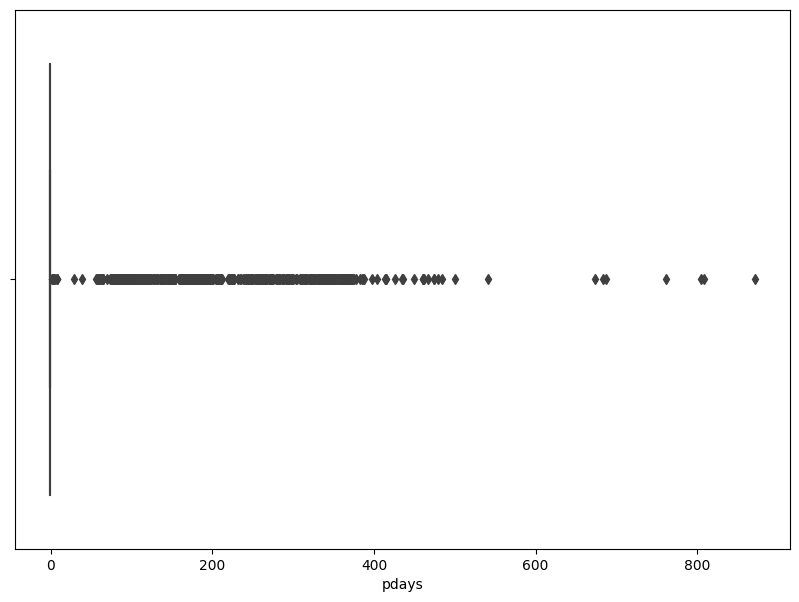

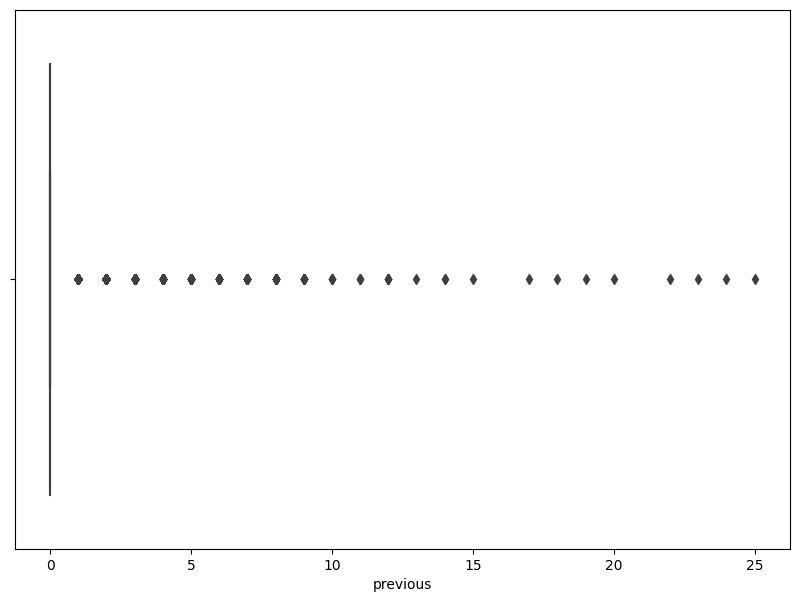

In [25]:
for i in num:
   plt.figure(figsize=(10,7))
   sns.boxplot(x=df2[i])


In [26]:
# There is realistic outliers data so we can keep this as it is

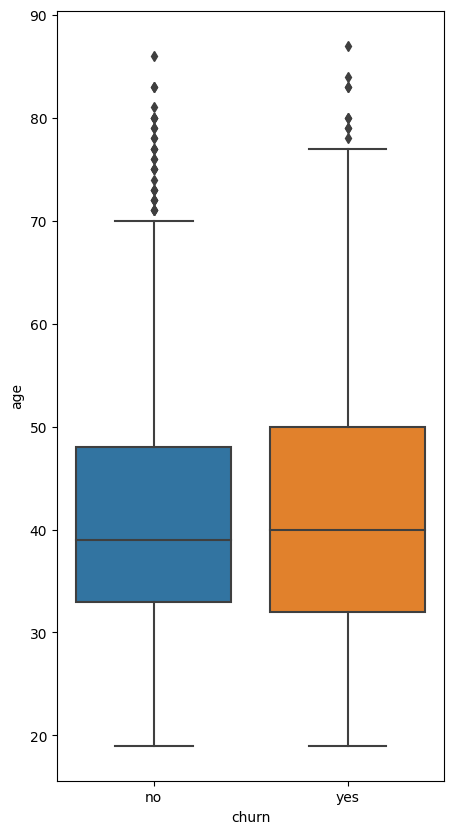

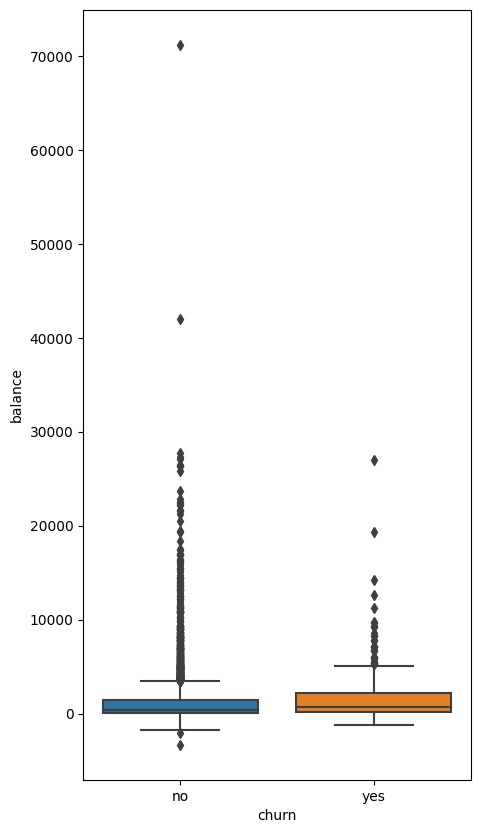

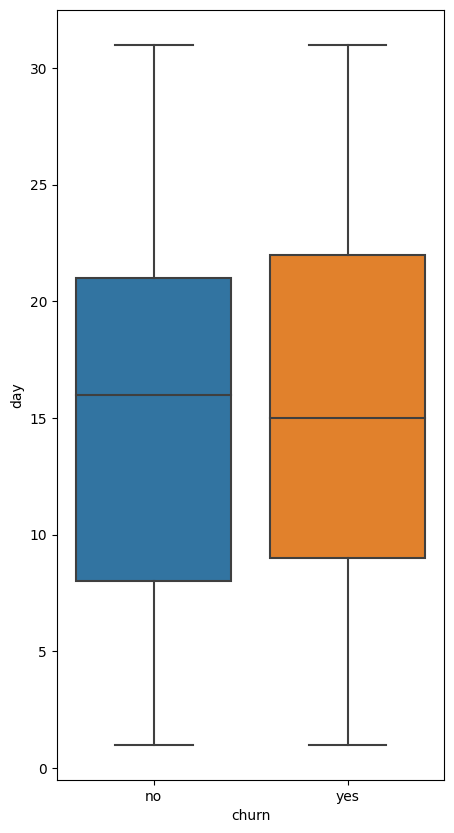

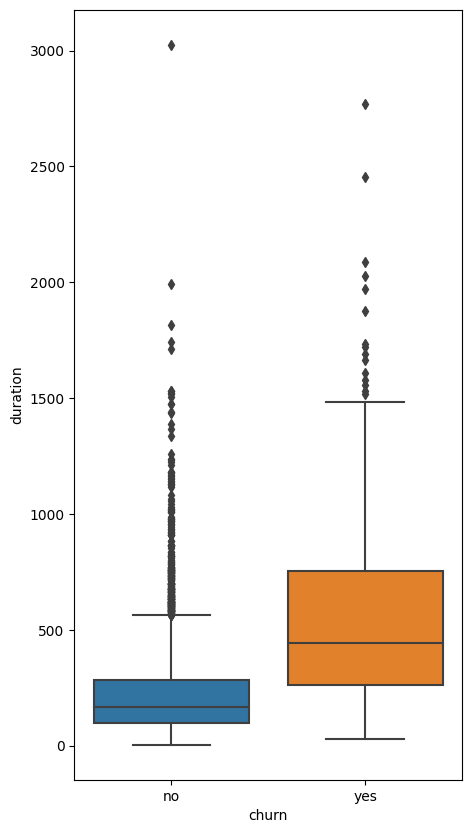

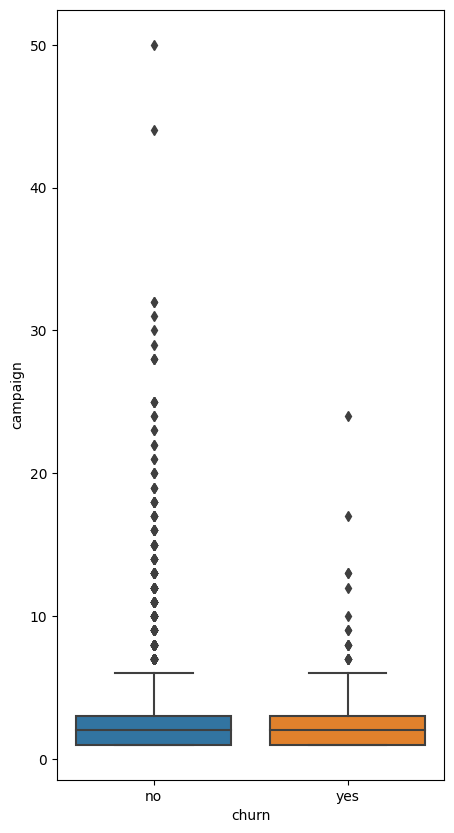

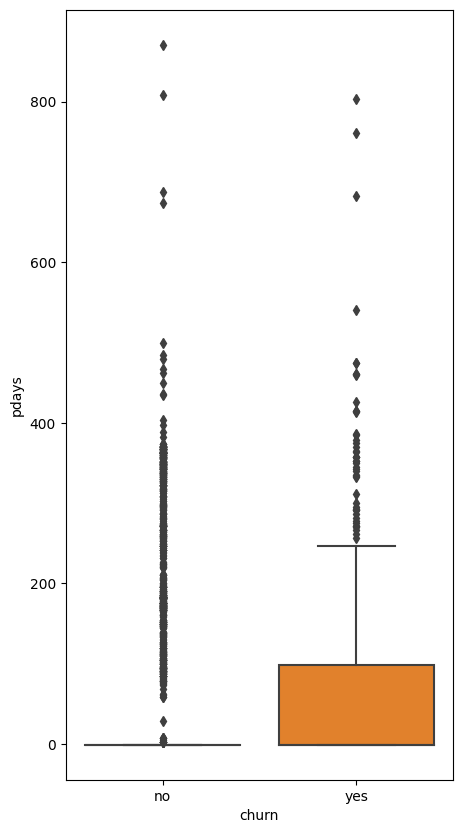

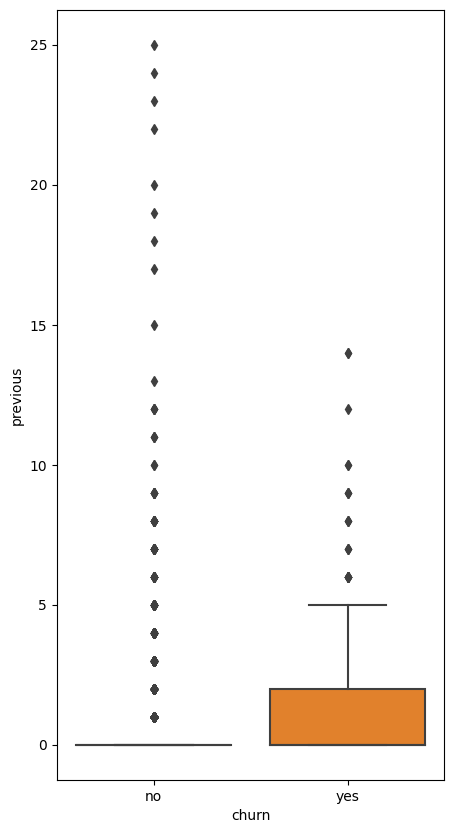

In [27]:
for i in num:
  plt.figure(figsize=(5,10))
  sns.boxplot(x=df2['churn'],y=df2[i])

In [28]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<AxesSubplot:>

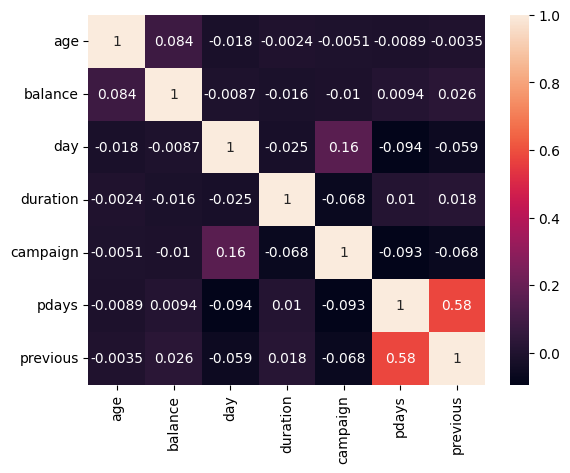

In [29]:
# To test the heteroscadascity
# using heat in order to know about the multicollinearity
sns.heatmap(df2.corr(),annot=True)

# From below graph it is clear that the data doesn't show multocollinearity in the data

In [30]:
df2['pdays']=np.where(df2['pdays']<0,0,df2['pdays']) #As days can't be negative so negative value implies that they are never been contacted

In [31]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [32]:
# To the normality of the data variable
list1=[]
list2=[]
for i in num:
  v=stats.shapiro(df2[i])
  list2.append(i)
  list1.append(v)

In [33]:
dict4={k:v for k,v in zip(list1,list2)}

In [34]:
dict4

{ShapiroResult(statistic=0.9595122933387756, pvalue=9.410944406190885e-34): 'age',
 ShapiroResult(statistic=0.5015109777450562, pvalue=0.0): 'balance',
 ShapiroResult(statistic=0.9607077836990356, pvalue=2.429091485049085e-33): 'day',
 ShapiroResult(statistic=0.7475357055664062, pvalue=0.0): 'duration',
 ShapiroResult(statistic=0.5608265399932861, pvalue=0.0): 'campaign',
 ShapiroResult(statistic=0.4699435234069824, pvalue=0.0): 'pdays',
 ShapiroResult(statistic=0.35998213291168213, pvalue=0.0): 'previous'}

In [35]:
# ttest  to determine 
list1=[]
list2=[]
for i in num:
  v=df2.loc[df2['churn']=='yes',i]
  u=df2.loc[df2['churn']=='no',i]
  cal=stats.ttest_ind(u,v)
  list1.append(i)
  list2.append(cal)

In [36]:
dictionary=zip(list1,list2)
dict1= {key:value for key,value in dictionary}

In [37]:
dict1 # from the test it is clear that age, duration,campaign,pdays,previous are the determining factors as there pvalue is 
# lesser than 0.05% of level of significance test resulting in selection of significant features contributing more in target evaluation

{'age': Ttest_indResult(statistic=-3.034315524024384, pvalue=0.002424535817380578),
 'balance': Ttest_indResult(statistic=-1.2038365069717434, pvalue=0.22871583038630486),
 'day': Ttest_indResult(statistic=0.7559228870961691, pvalue=0.44973483173399975),
 'duration': Ttest_indResult(statistic=-29.436469891173097, pvalue=2.1504449021625194e-174),
 'campaign': Ttest_indResult(statistic=4.11825110915871, pvalue=3.88579357120783e-05),
 'pdays': Ttest_indResult(statistic=-7.01639296555123, pvalue=2.614843203397622e-12),
 'previous': Ttest_indResult(statistic=-7.899945834860368, pvalue=3.477970686483045e-15)}

In [38]:
# chisqaure to test the relation of categorical variable with the target variable
for i in cat:
    if i!='churn':
        table=pd.crosstab(df2[i], df2['churn'])
        print(i)
        v=chi2_contingency(table)
        print(v)  # for pvalue refer to the second value for example for job  p value= 1.90e-10
# from this test it is clear that we a drop default feature as this is unrealted to the target column that churn

job
(68.98828575267176, 1.901391096662705e-10, 11, array([[422.91528423,  55.08471577],
       [836.98296837, 109.01703163],
       [148.63968149,  19.36031851],
       [ 99.09312099,  12.90687901],
       [857.33244857, 111.66755143],
       [203.49480203,  26.50519797],
       [161.91108162,  21.08891838],
       [368.94492369,  48.05507631],
       [ 74.31984074,   9.68015926],
       [679.49568679,  88.50431321],
       [113.24928113,  14.75071887],
       [ 33.62088034,   4.37911966]]))
marital
(19.03005634409817, 7.373535401823763e-05, 2, array([[ 467.15328467,   60.84671533],
       [2474.67374475,  322.32625525],
       [1058.17297058,  137.82702942]]))
education
(15.236579554873757, 0.001625240003630989, 3, array([[ 599.867286  ,   78.132714  ],
       [2040.2565804 ,  265.7434196 ],
       [1194.42601194,  155.57398806],
       [ 165.45012165,   21.54987835]]))
default
(0.0, 1.0, 1, array([[3932.75823933,  512.24176067],
       [  67.24176067,    8.75823933]]))
housing
(48.88

In [39]:
df3=df2.copy()

In [40]:
df2['contact'].value_counts(normalize=True)

cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: contact, dtype: float64

In [41]:
df3 # for p outcome unknown category is treated as separate 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [42]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'churn'],
      dtype='object')

In [43]:
df2.groupby('marital')['churn'].value_counts() # Major count of churned clients are having maritsl status

marital   churn
divorced  no        451
          yes        77
married   no       2520
          yes       277
single    no       1029
          yes       167
Name: churn, dtype: int64

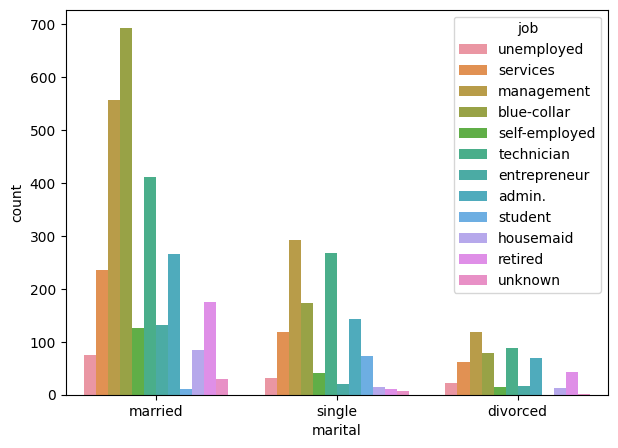

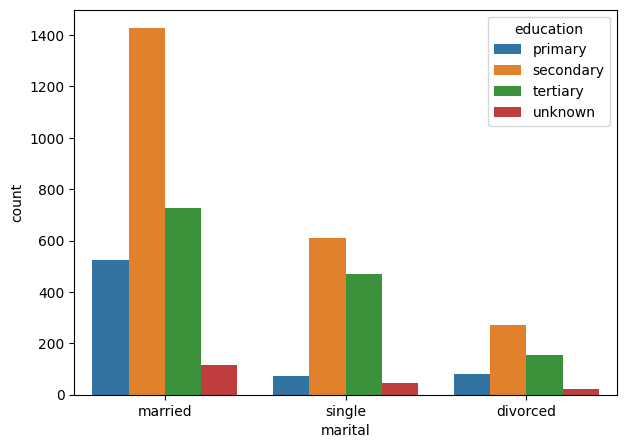

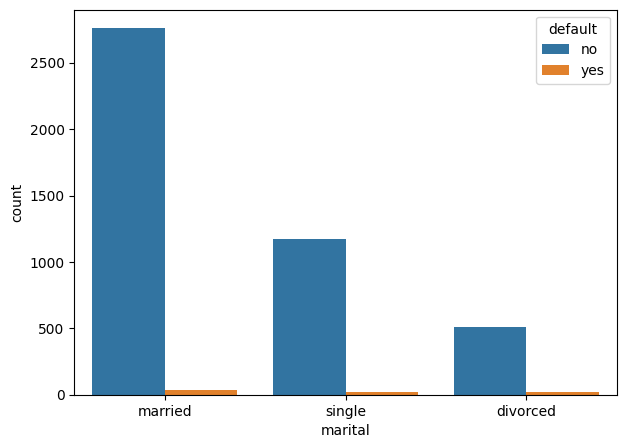

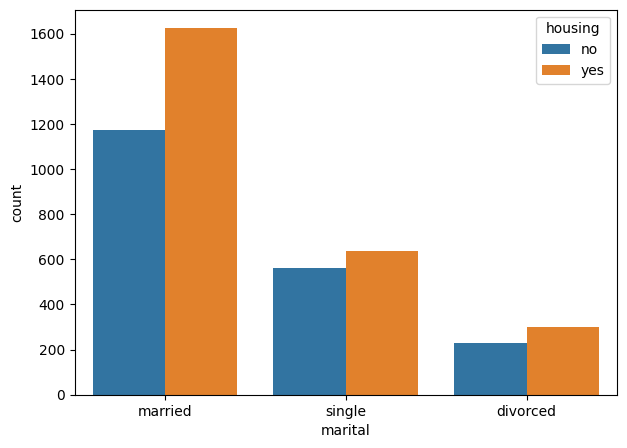

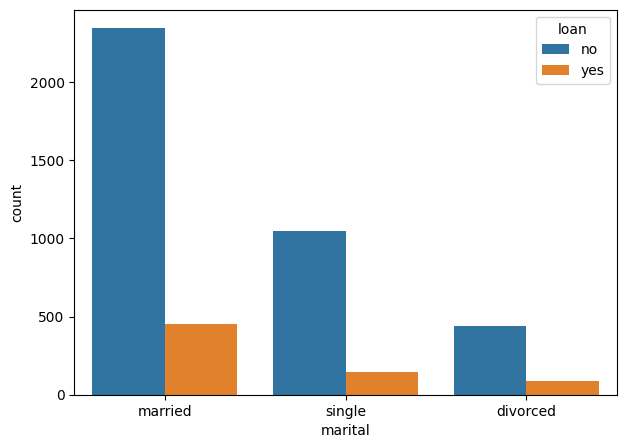

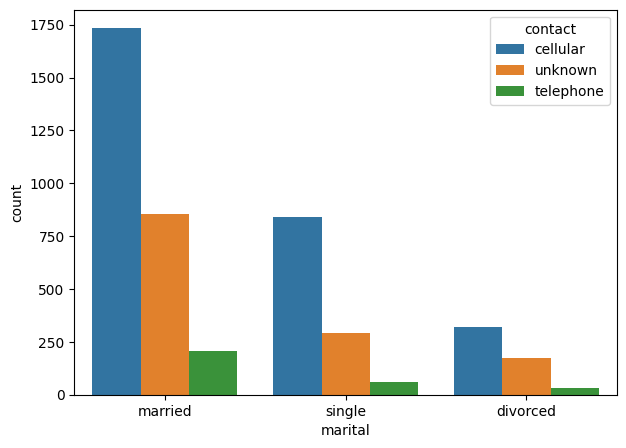

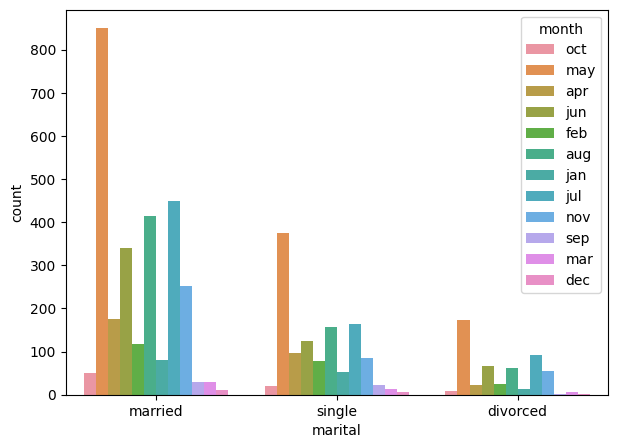

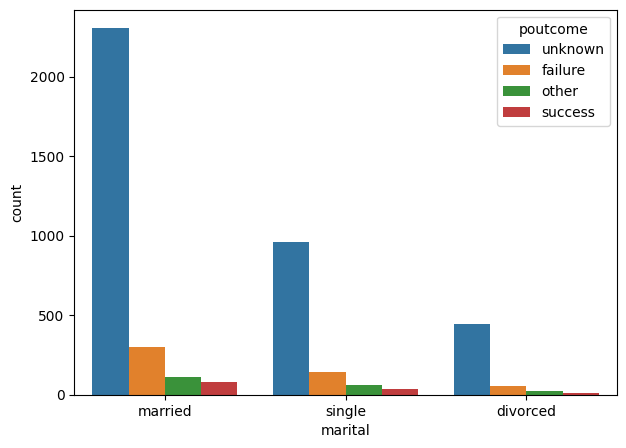

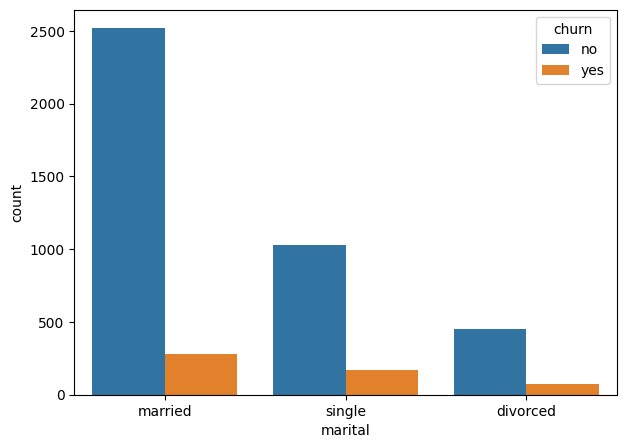

In [44]:
for i in cat:
  if i!='marital':
    plt.figure(figsize=(7,5))
    sns.countplot(x=df2['marital'], hue=df2[i])


<AxesSubplot:xlabel='education', ylabel='count'>

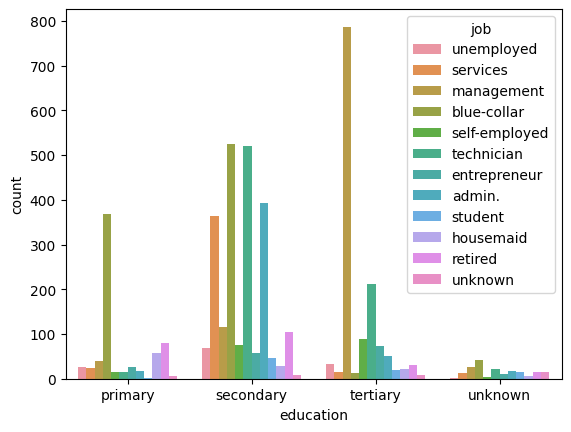

In [45]:
sns.countplot(x=df2['education'],hue=df2['job'])

In [46]:
len(df2.loc[(df2['job']=='management') &(df2['marital']=='married')& (df2['churn']=='yes')])

77

In [47]:
len(df2.loc[(df2['job']=='management') &(df2['marital']=='married')& (df2['housing']=='yes')& (df2['churn']=='yes')])

39

In [48]:
len(df2.loc[(df2['job']=='blue-collar') &(df2['marital']=='married')& (df2['churn']=='yes')])

35

In [49]:
len(df2.loc[(df2['job']=='blue-collar') &(df2['marital']=='married')&  (df2['loan']=='yes')&(df2['churn']=='yes')])

5

In [50]:
with pd.option_context('display.max_rows',None):
    print(df2.groupby(['job','marital'])['housing'].value_counts())

job            marital   housing
admin.         divorced  yes         43
                         no          26
               married   yes        168
                         no          98
               single    yes         91
                         no          52
blue-collar    divorced  yes         53
                         no          26
               married   yes        520
                         no         173
               single    yes        122
                         no          52
entrepreneur   divorced  yes          9
                         no           7
               married   yes         75
                         no          57
               single    no          10
                         yes         10
housemaid      divorced  no           8
                         yes          5
               married   no          55
                         yes         29
               single    no          10
                         yes          5
managem

<AxesSubplot:xlabel='housing', ylabel='count'>

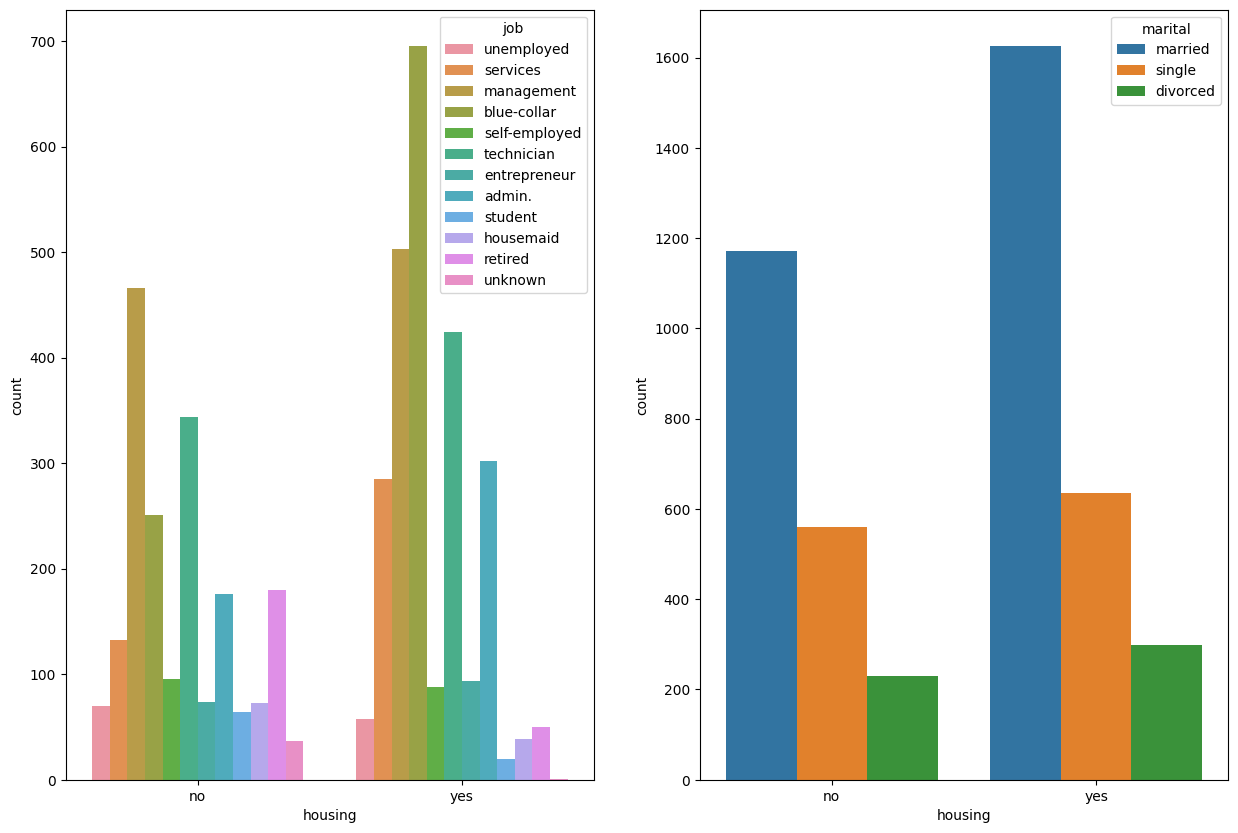

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df2['housing'],hue=df2['job'])
plt.subplot(1,2,2)
sns.countplot(x=df2['housing'],hue=df2['marital'])

In [52]:
df2['job']

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: job, Length: 4521, dtype: object

In [53]:
# 1) From above chart it is clear that majority of the married person leave the company services, reason can be concluded that majority of the  married clients are personal loans and housing loans
# borrowers so their financial crisis could be the reason for the churn
# 2)  on the basis of education it is clearly seen that in married category blue-collar accounts more are secondary education holder after that mangement people were territiary 
# education holders, in which churned  management clients accounts more with the married status
# 3) Management job profile clients are accomdating them with more of the housing and personal loans  having married marital status are observed in the category of 
# churning one

In [54]:
df2.groupby('education')['churn'].value_counts()

education  churn
primary    no        614
           yes        64
secondary  no       2061
           yes       245
tertiary   no       1157
           yes       193
unknown    no        168
           yes        19
Name: churn, dtype: int64

In [55]:
df2.groupby('education')['job'].value_counts()

education  job          
primary    blue-collar      369
           retired           80
           housemaid         57
           management        39
           entrepreneur      26
           unemployed        26
           services          25
           admin.            17
           self-employed     15
           technician        15
           unknown            7
           student            2
secondary  blue-collar      524
           technician       520
           admin.           393
           services         363
           management       116
           retired          105
           self-employed     76
           unemployed        68
           entrepreneur      58
           student           47
           housemaid         28
           unknown            8
tertiary   management       787
           technician       211
           self-employed     88
           entrepreneur      73
           admin.            51
           unemployed        32
           reti

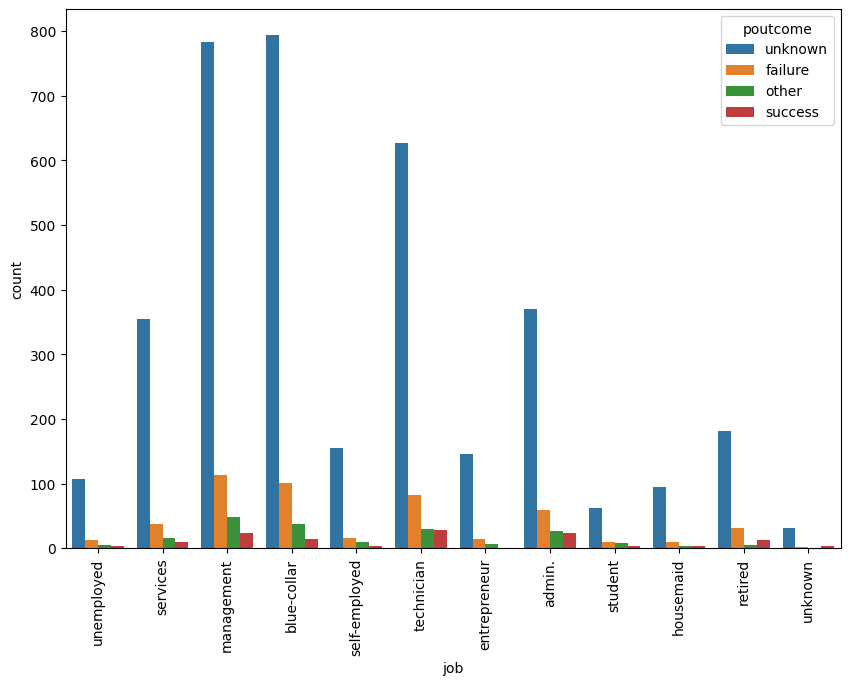

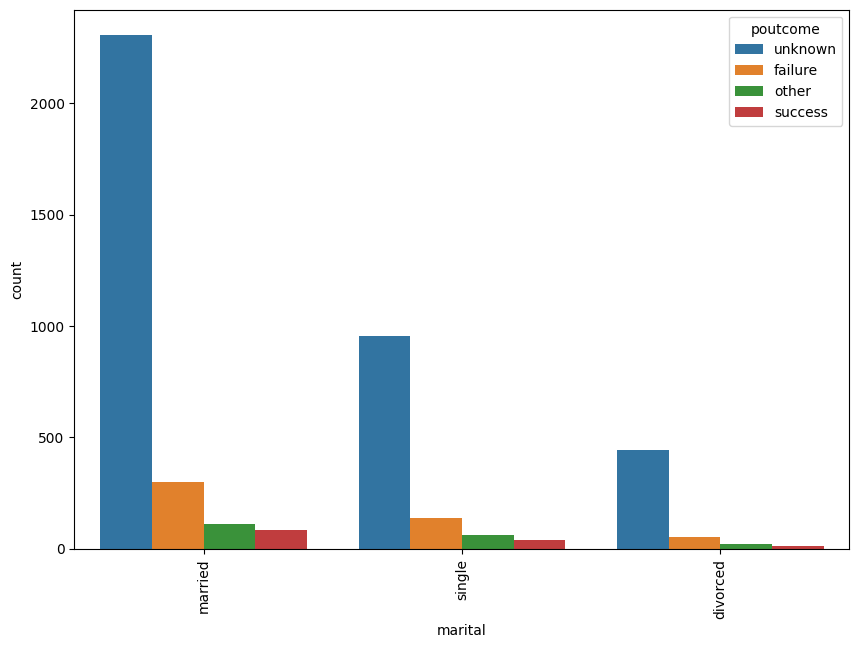

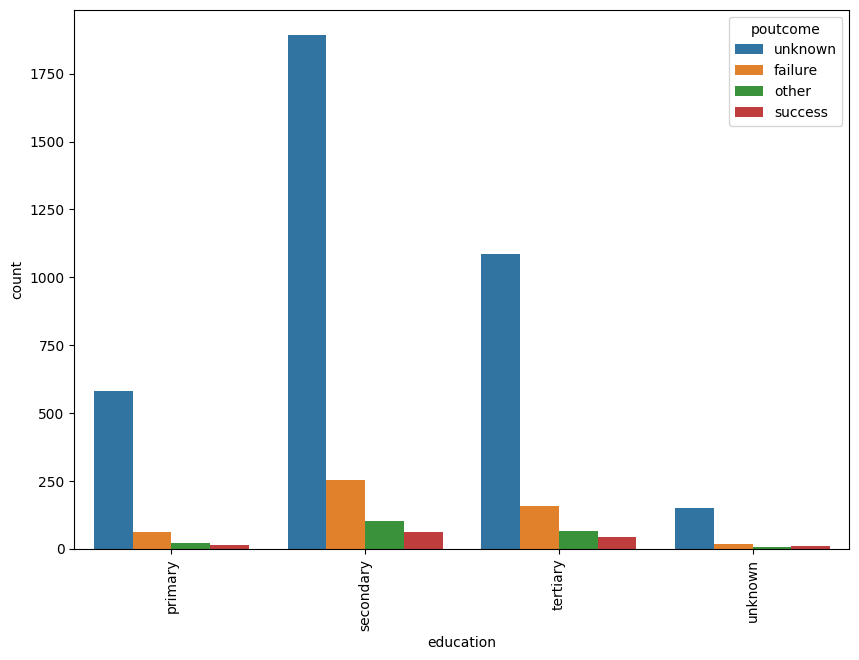

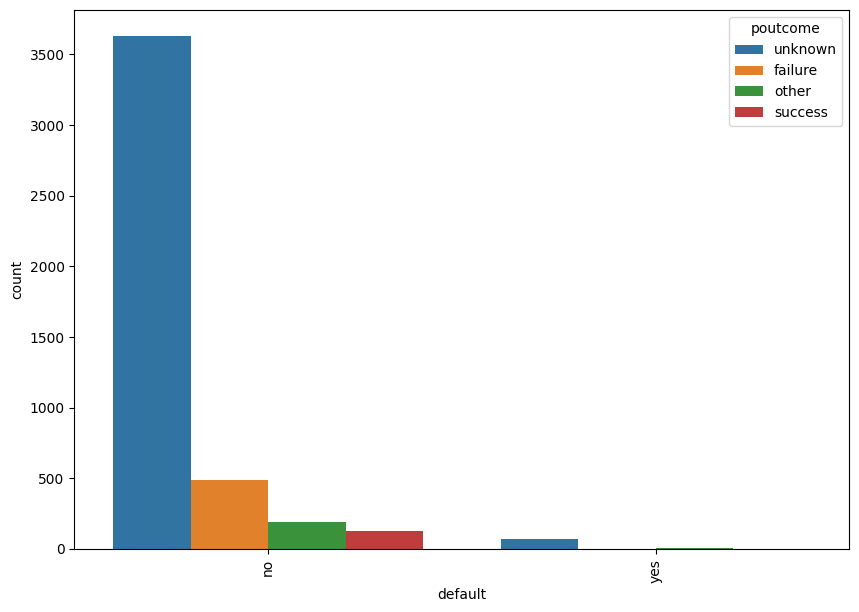

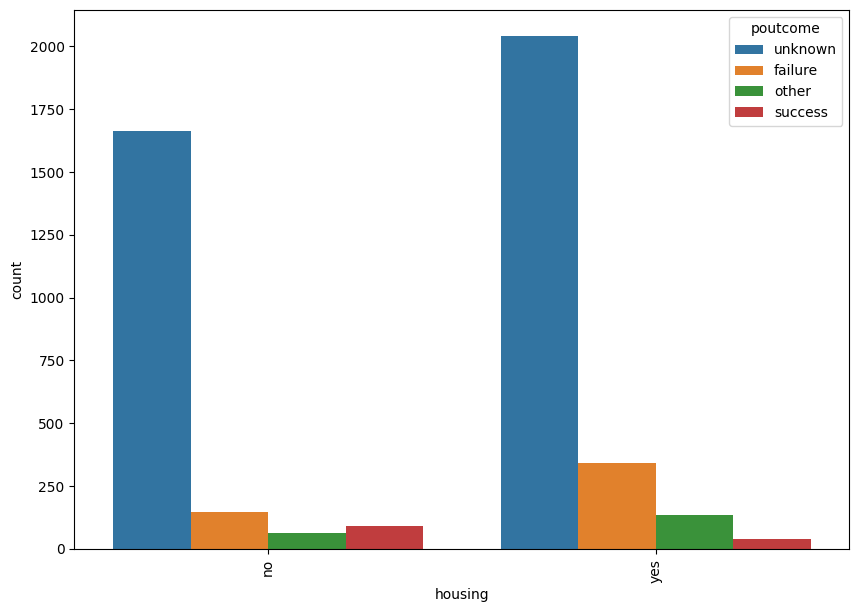

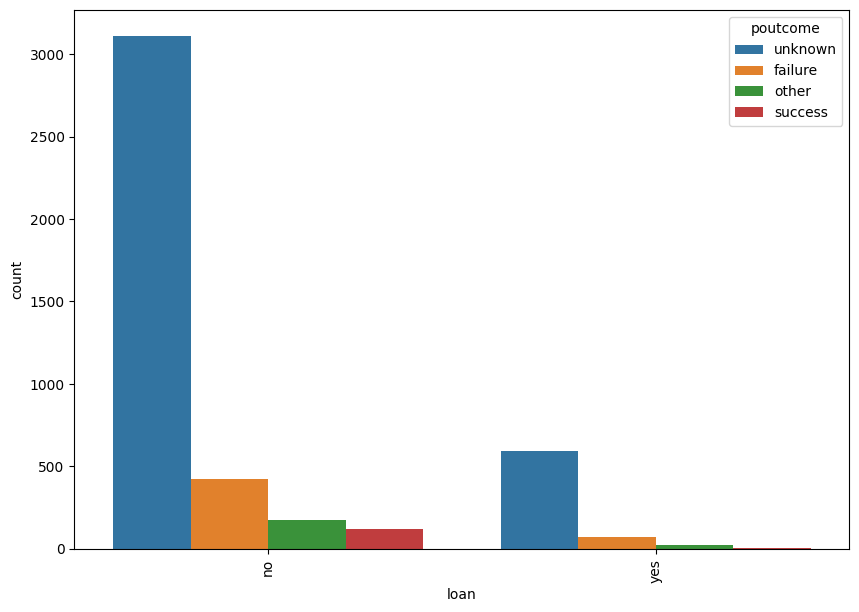

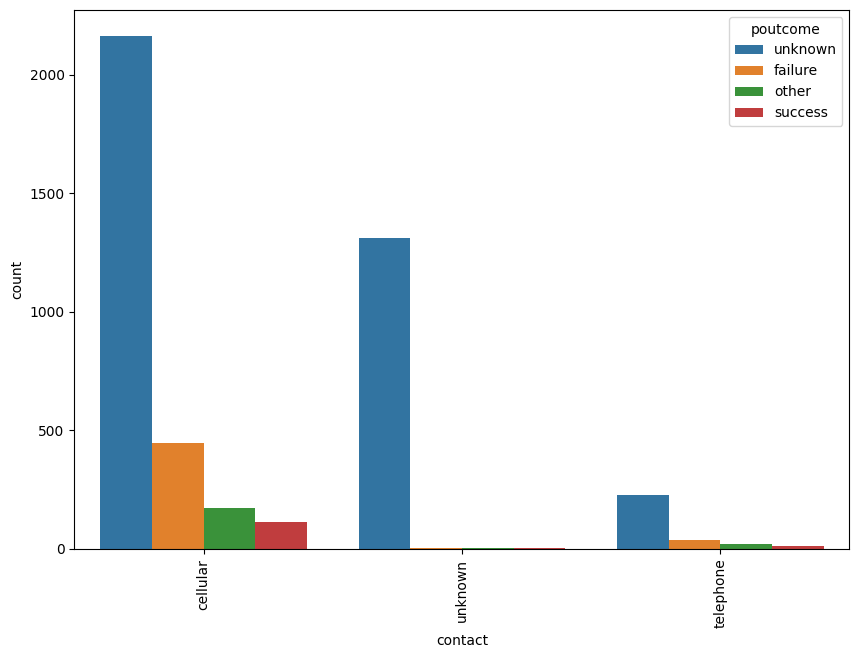

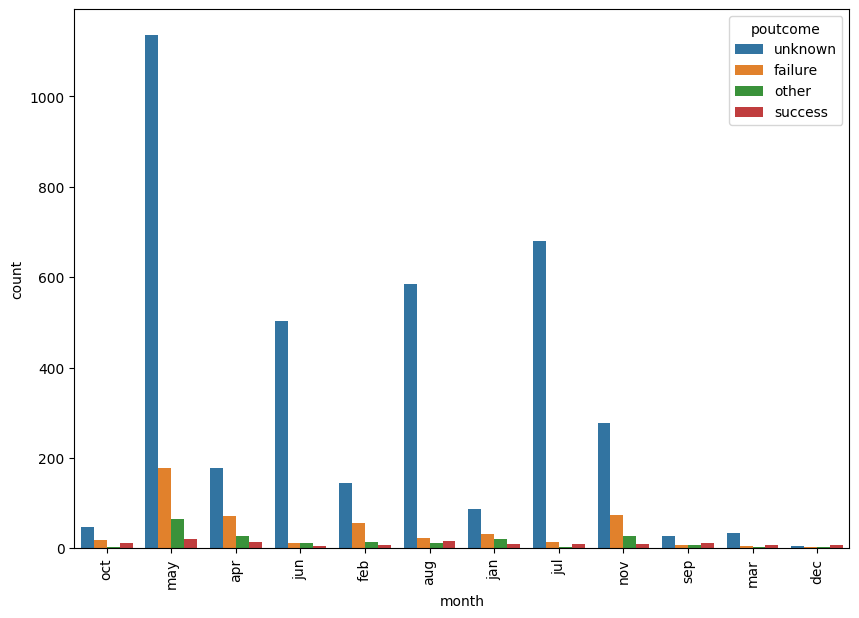

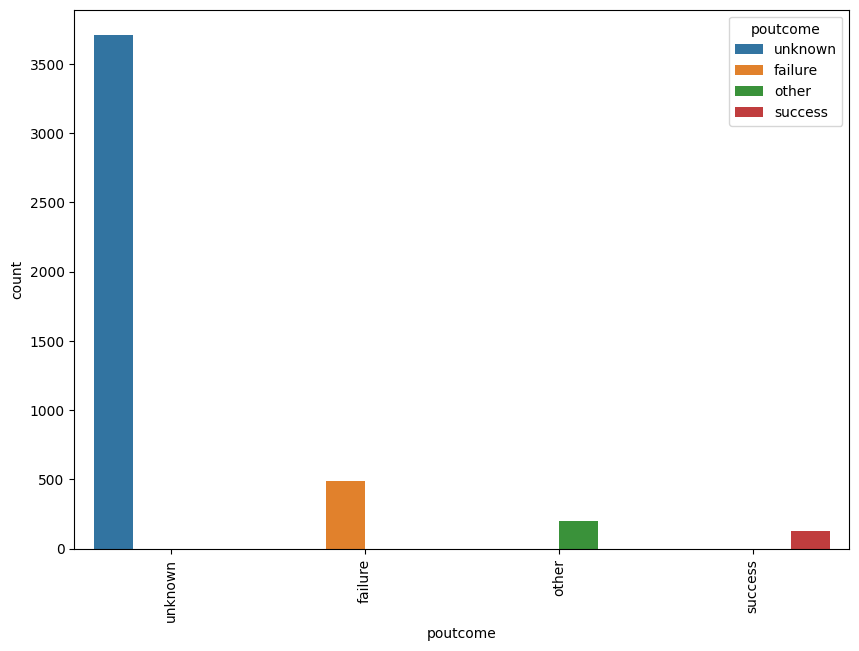

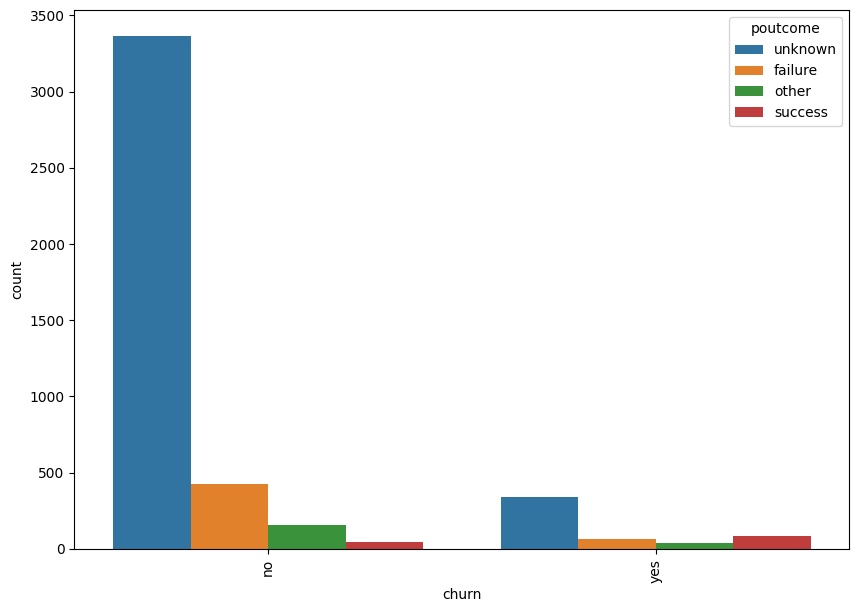

In [56]:
for i in cat:
  plt.figure(figsize=(10,7))
  sns.countplot(x=df2[i],hue=df2['poutcome'])
  plt.xticks(rotation=90)

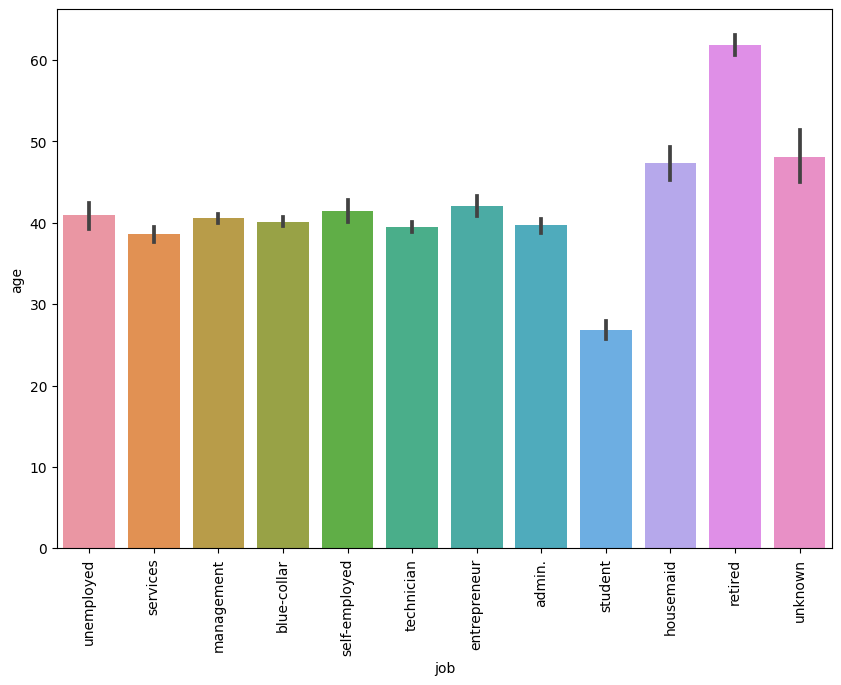

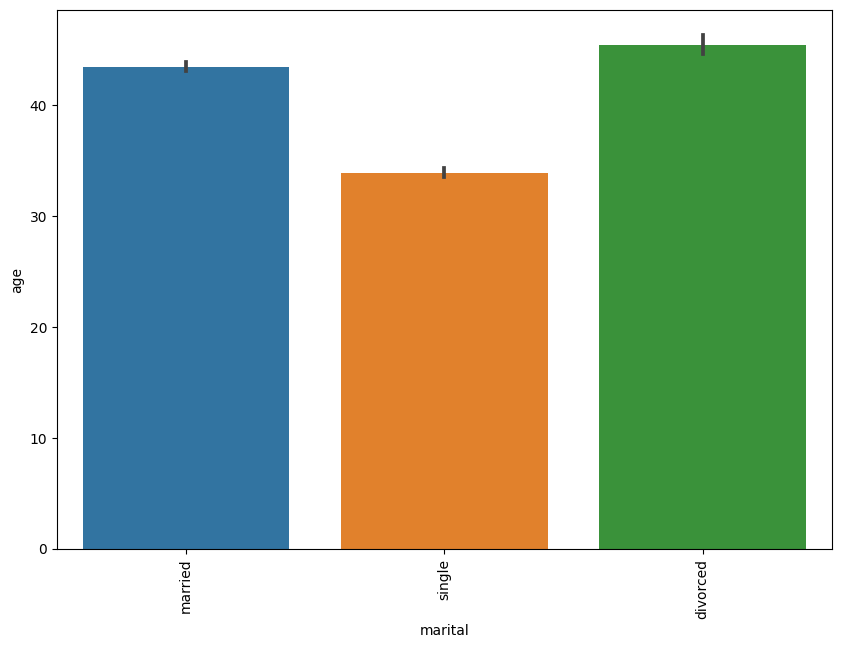

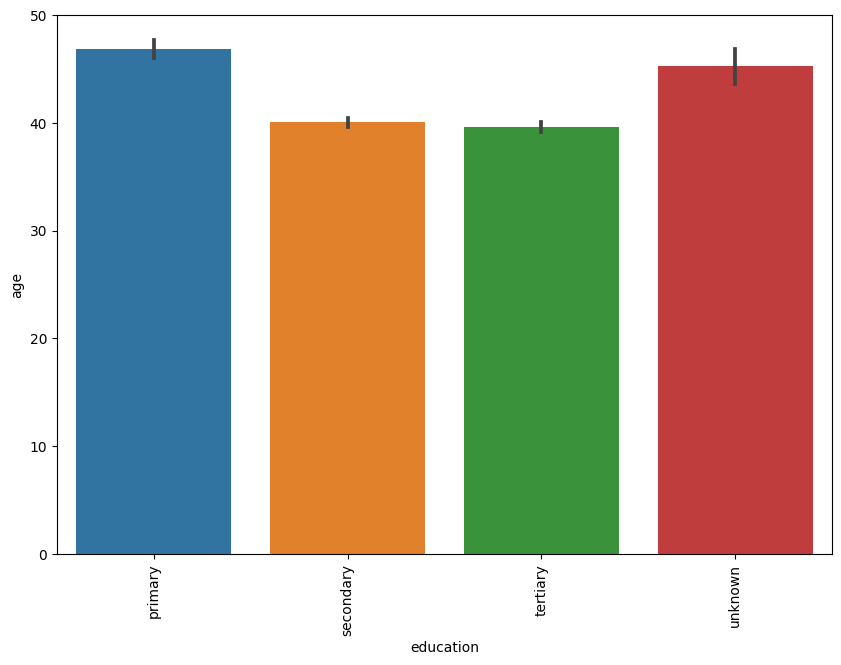

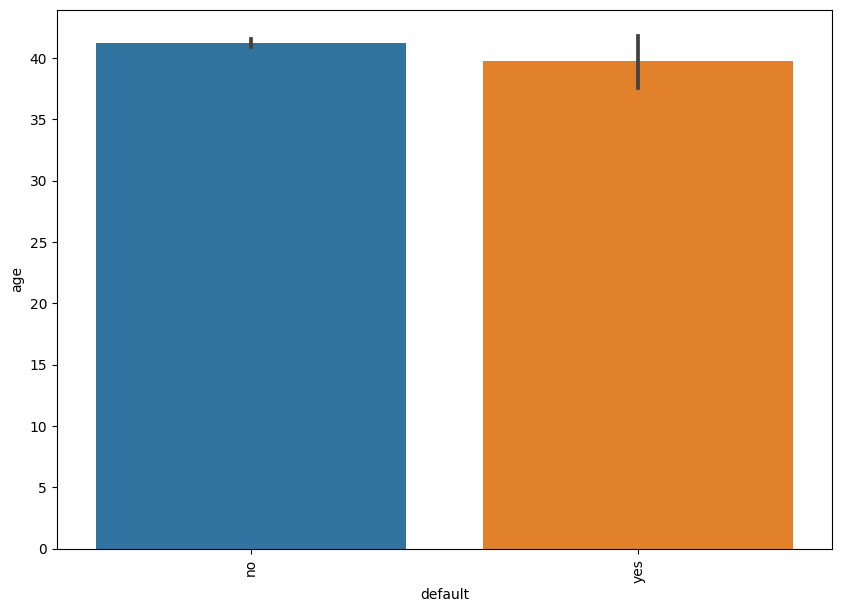

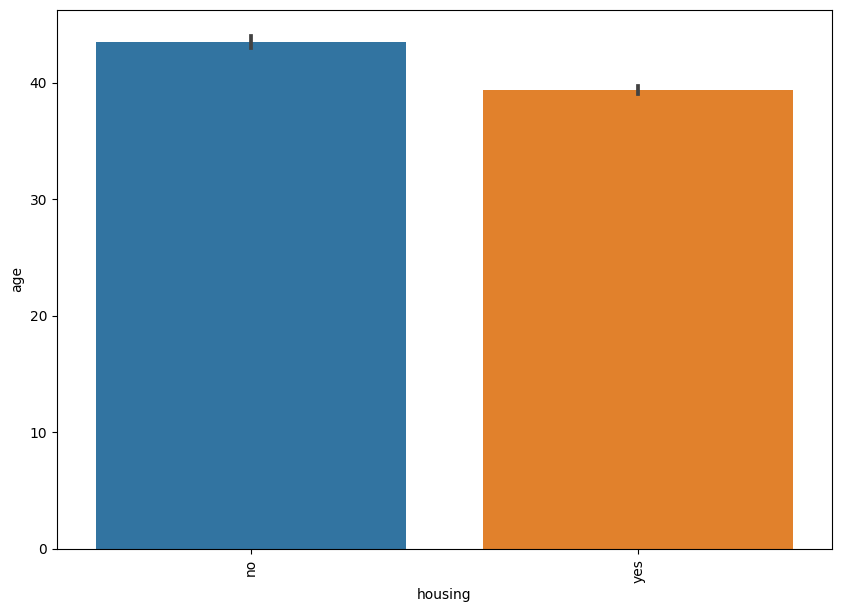

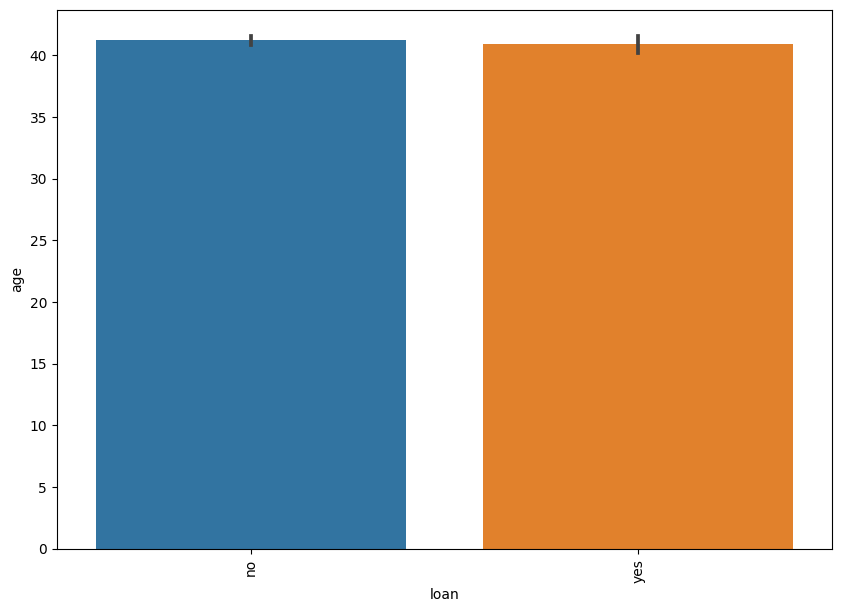

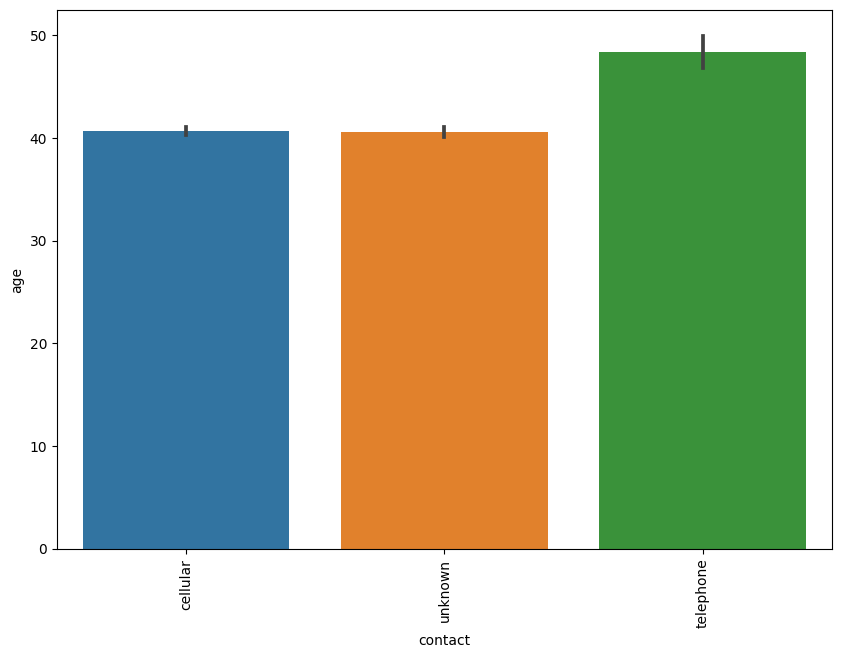

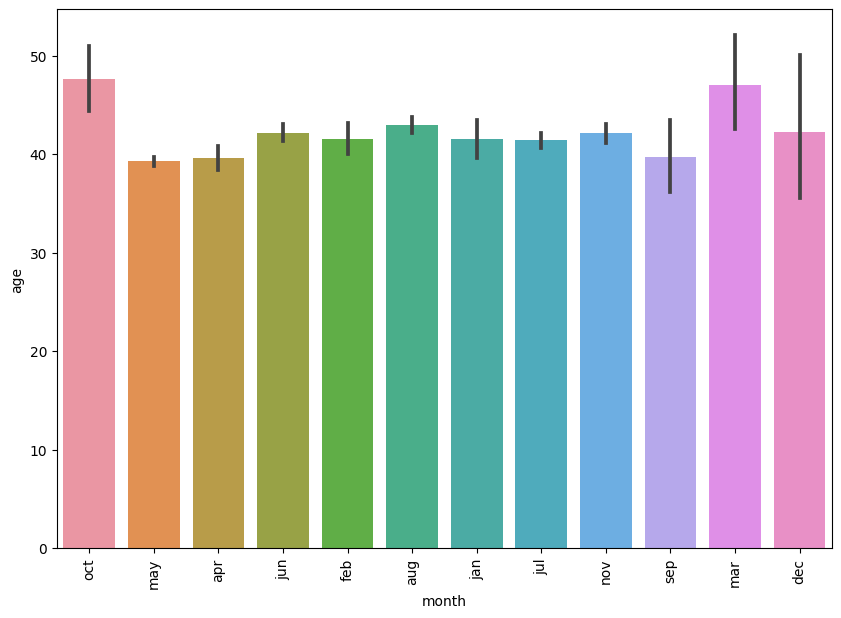

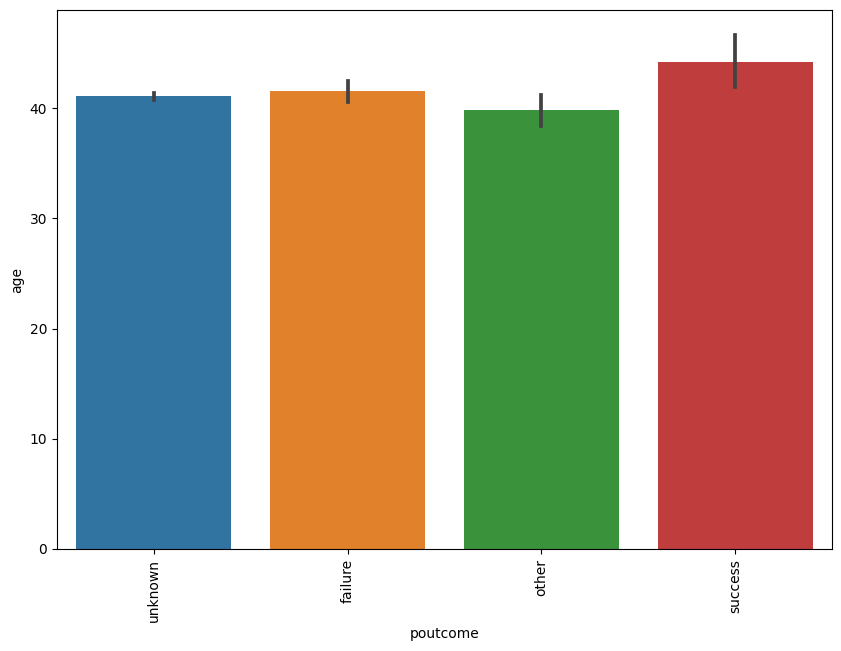

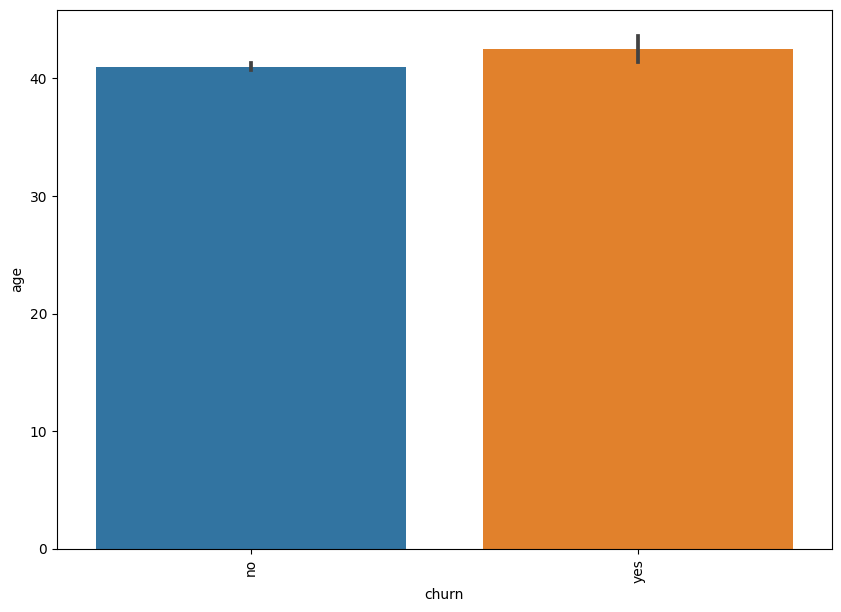

In [57]:
for i in cat:
  plt.figure(figsize=(10,7))
  sns.barplot(x=df2[i],y=df2['age'])
  plt.xticks(rotation=90)

In [58]:
df2.groupby('poutcome')['churn'].value_counts(normalize=True)
#1) the unkown factor of poutcome is area of critical analysis, beacuse of which company has observed higher churned count 
#2) one more point to be considered by the company is that after getting sucessfull campaign chured percentage observed among sucess group is 35%  on which we can work upon and try to get it down by 
# observing major factors of concerned leading to this percentage 

poutcome  churn
failure   no       0.871429
          yes      0.128571
other     no       0.807107
          yes      0.192893
success   yes      0.643411
          no       0.356589
unknown   no       0.909042
          yes      0.090958
Name: churn, dtype: float64

In [59]:
df3 # for p outcome we will treat unknown as separate category and for contact as well we treat unknown as separate category as there are others means of phone calling like wifi-calling, video-calling etc and we are not sure which medium it could be

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [60]:
df3.drop(['balance','default','day'], axis=1,inplace=True)

In [61]:
df3

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,churn
0,30,unemployed,married,primary,no,no,cellular,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,yes,yes,unknown,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,yes,no,unknown,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,yes,no,cellular,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,unknown,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,no,cellular,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,cellular,feb,129,4,211,3,other,no


In [62]:
val1= df3['job'].value_counts(normalize=True).to_dict()

In [63]:
df3['job']=df3['job'].map(val1)

In [64]:
df3

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,churn
0,30,0.028312,married,primary,no,no,cellular,oct,79,1,0,0,unknown,no
1,33,0.092236,married,secondary,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,0.214333,single,tertiary,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,0.214333,married,tertiary,yes,yes,unknown,jun,199,4,0,0,unknown,no
4,59,0.209246,married,secondary,yes,no,unknown,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,married,secondary,yes,no,cellular,jul,329,5,0,0,unknown,no
4517,57,0.040478,married,tertiary,yes,yes,unknown,may,153,1,0,0,unknown,no
4518,57,0.169874,married,secondary,no,no,cellular,aug,151,11,0,0,unknown,no
4519,28,0.209246,married,secondary,no,no,cellular,feb,129,4,211,3,other,no


In [65]:
df3['month']=df3['month'].map(df3['month'].value_counts(normalize=True).to_dict())

In [66]:
df3

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,churn
0,30,0.028312,married,primary,no,no,cellular,0.017695,79,1,0,0,unknown,no
1,33,0.092236,married,secondary,yes,yes,cellular,0.309224,220,1,339,4,failure,no
2,35,0.214333,single,tertiary,yes,no,cellular,0.064809,185,1,330,1,failure,no
3,30,0.214333,married,tertiary,yes,yes,unknown,0.117452,199,4,0,0,unknown,no
4,59,0.209246,married,secondary,yes,no,unknown,0.309224,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,married,secondary,yes,no,cellular,0.156160,329,5,0,0,unknown,no
4517,57,0.040478,married,tertiary,yes,yes,unknown,0.309224,153,1,0,0,unknown,no
4518,57,0.169874,married,secondary,no,no,cellular,0.140013,151,11,0,0,unknown,no
4519,28,0.209246,married,secondary,no,no,cellular,0.049104,129,4,211,3,other,no


In [67]:
df3.drop('churn',axis=1,inplace=True)

In [68]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [69]:
df3=pd.get_dummies(data=df3,columns=[ 'marital','housing', 'loan','contact'],drop_first=True)

In [70]:
df3

,age,job,education,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,contact_unknown
0,30,0.028312,primary,0.017695,79,1,0,0,unknown,1,0,0,0,0,0
1,33,0.092236,secondary,0.309224,220,1,339,4,failure,1,0,1,1,0,0
2,35,0.214333,tertiary,0.064809,185,1,330,1,failure,0,1,1,0,0,0
3,30,0.214333,tertiary,0.117452,199,4,0,0,unknown,1,0,1,1,0,1
4,59,0.209246,secondary,0.309224,226,1,0,0,unknown,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,secondary,0.156160,329,5,0,0,unknown,1,0,1,0,0,0
4517,57,0.040478,tertiary,0.309224,153,1,0,0,unknown,1,0,1,1,0,1
4518,57,0.169874,secondary,0.140013,151,11,0,0,unknown,1,0,0,0,0,0
4519,28,0.209246,secondary,0.049104,129,4,211,3,other,1,0,0,0,0,0


In [71]:
for i in ['education','poutcome']:
    df3[i]=df3[i].map(df3[i].value_counts(normalize=True).to_dict())
    


In [72]:
df3

,age,job,education,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,contact_unknown
0,30,0.028312,0.149967,0.017695,79,1,0,0,0.819509,1,0,0,0,0,0
1,33,0.092236,0.510064,0.309224,220,1,339,4,0.108383,1,0,1,1,0,0
2,35,0.214333,0.298607,0.064809,185,1,330,1,0.108383,0,1,1,0,0,0
3,30,0.214333,0.298607,0.117452,199,4,0,0,0.819509,1,0,1,1,0,1
4,59,0.209246,0.510064,0.309224,226,1,0,0,0.819509,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.510064,0.156160,329,5,0,0,0.819509,1,0,1,0,0,0
4517,57,0.040478,0.298607,0.309224,153,1,0,0,0.819509,1,0,1,1,0,1
4518,57,0.169874,0.510064,0.140013,151,11,0,0,0.819509,1,0,0,0,0,0
4519,28,0.209246,0.510064,0.049104,129,4,211,3,0.043574,1,0,0,0,0,0


In [73]:
num.drop(['balance','day'],axis=1,inplace=True)

In [74]:
num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [75]:
stats.yeojohnson(df3['age'])[0]

array([2.40659716, 2.44941199, 2.47547045, ..., 2.6805349 , 2.37513809,
       2.57410862])

In [76]:
df3

,age,job,education,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,contact_unknown
0,30,0.028312,0.149967,0.017695,79,1,0,0,0.819509,1,0,0,0,0,0
1,33,0.092236,0.510064,0.309224,220,1,339,4,0.108383,1,0,1,1,0,0
2,35,0.214333,0.298607,0.064809,185,1,330,1,0.108383,0,1,1,0,0,0
3,30,0.214333,0.298607,0.117452,199,4,0,0,0.819509,1,0,1,1,0,1
4,59,0.209246,0.510064,0.309224,226,1,0,0,0.819509,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.510064,0.156160,329,5,0,0,0.819509,1,0,1,0,0,0
4517,57,0.040478,0.298607,0.309224,153,1,0,0,0.819509,1,0,1,1,0,1
4518,57,0.169874,0.510064,0.140013,151,11,0,0,0.819509,1,0,0,0,0,0
4519,28,0.209246,0.510064,0.049104,129,4,211,3,0.043574,1,0,0,0,0,0


In [77]:
for i in ['age', 'duration', 'campaign', 'pdays', 'previous']:
    df3[i]=stats.yeojohnson(df3[i])[0]

<AxesSubplot:ylabel='Density'>

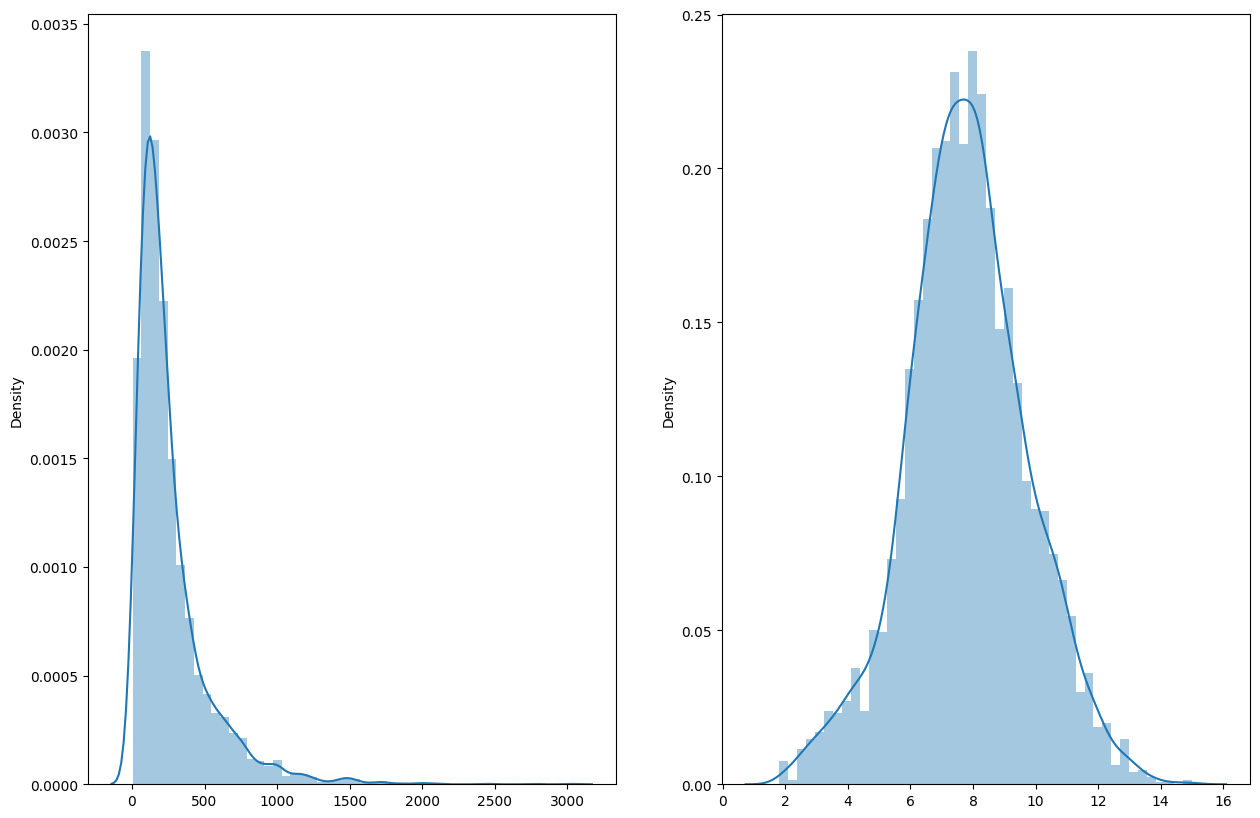

In [78]:
plt.figure(figsize=(15,10))
axs1=plt.subplot(1,2,1)
sns.distplot(x=df2['duration'])
xs2=plt.subplot(1,2,2)
sns.distplot(x=df3['duration'])# Transformation is done to convert the positively skewed data to the normal one and yeojohnson transformatiom is suitable to the numerical variables of this data because we have 0 values in the respective features as well

In [79]:
df3

,age,job,education,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,contact_unknown
0,2.406597,0.028312,0.149967,0.017695,6.093480,0.488264,-0.000000,-0.000000,0.819509,1,0,0,0,0,0
1,2.449412,0.092236,0.510064,0.309224,8.140414,0.488264,0.971774,0.237020,0.108383,1,0,1,1,0,0
2,2.475470,0.214333,0.298607,0.064809,7.771807,0.488264,0.971705,0.224505,0.108383,0,1,1,0,0,0
3,2.406597,0.214333,0.298607,0.117452,7.925848,0.764097,-0.000000,-0.000000,0.819509,1,0,1,1,0,1
4,2.694305,0.209246,0.510064,0.309224,8.198503,0.488264,-0.000000,-0.000000,0.819509,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2.449412,0.092236,0.510064,0.156160,9.033538,0.793306,-0.000000,-0.000000,0.819509,1,0,1,0,0,0
4517,2.680535,0.040478,0.298607,0.309224,7.378476,0.488264,-0.000000,-0.000000,0.819509,1,0,1,1,0,1
4518,2.680535,0.169874,0.510064,0.140013,7.351633,0.864096,-0.000000,-0.000000,0.819509,1,0,0,0,0,0
4519,2.375138,0.209246,0.510064,0.049104,7.034442,0.764097,0.970241,0.236600,0.043574,1,0,0,0,0,0


In [80]:
x=df3
y=df2['churn']

In [81]:
y=pd.get_dummies(y,drop_first=True)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

In [83]:
def score(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print('accuracy',accuracy_score(acc,pred))
    print('recall',recall_score(acc,pred))
    print('auc_score',roc_auc_score(acc,pred))
    print('classification_report \n',classification_report(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [84]:
# Applying machine learning models

In [ ]:
# Logistic Regression

In [96]:
score(y_test,y_pred_lr)

confusion_matrix 
 [[643 158]
 [ 18  86]]
cohen_kappa_score 0.3970960073886778
accuracy 0.8055248618784531
recall 0.8269230769230769
auc_score 0.8148348218572936
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       801
           1       0.35      0.83      0.49       104

    accuracy                           0.81       905
   macro avg       0.66      0.81      0.69       905
weighted avg       0.90      0.81      0.84       905



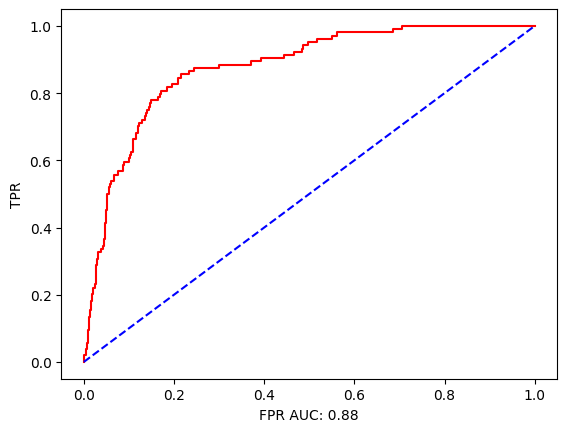

In [97]:
roc(y_test,model_lr.predict_proba(x_test)[:,1])

In [95]:
lr=LogisticRegression( class_weight='balanced')
model_lr=lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

In [ ]:
# Decision Tree

In [98]:
dt=dt=DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
model_dt=dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
score(y_test,y_pred_dt)

confusion_matrix 
 [[749  52]
 [ 61  43]]
cohen_kappa_score 0.3621791873265351
accuracy 0.8751381215469614
recall 0.41346153846153844
auc_score 0.6742713435129164
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       801
           1       0.45      0.41      0.43       104

    accuracy                           0.88       905
   macro avg       0.69      0.67      0.68       905
weighted avg       0.87      0.88      0.87       905



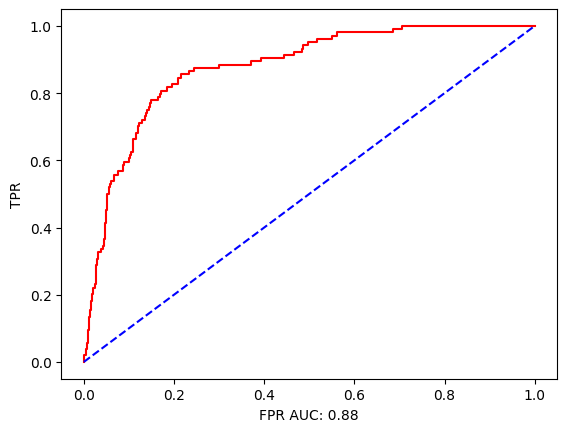

In [99]:
roc(y_test,model_lr.predict_proba(x_test)[:,1])

In [ ]:
# Random Forests

confusion_matrix 
 [[788  13]
 [ 84  20]]
cohen_kappa_score 0.250476003449424
accuracy 0.8928176795580111
recall 0.19230769230769232
auc_score 0.588038989724383
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       801
           1       0.61      0.19      0.29       104

    accuracy                           0.89       905
   macro avg       0.75      0.59      0.62       905
weighted avg       0.87      0.89      0.87       905



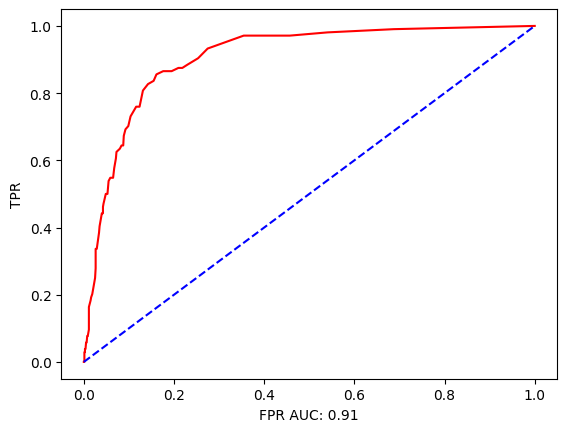

In [112]:
rf=RandomForestClassifier(class_weight='balanced')
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_rf.predict_proba(x_test)[:,1])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.050 total time=   0.6s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.094 total time=   0.6s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.086 total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.050 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.072 total time=   1.2s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.086 total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.043 total time=   1.7s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.086 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.086 total time=   1.7s
[CV 1/3] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.086 total ti

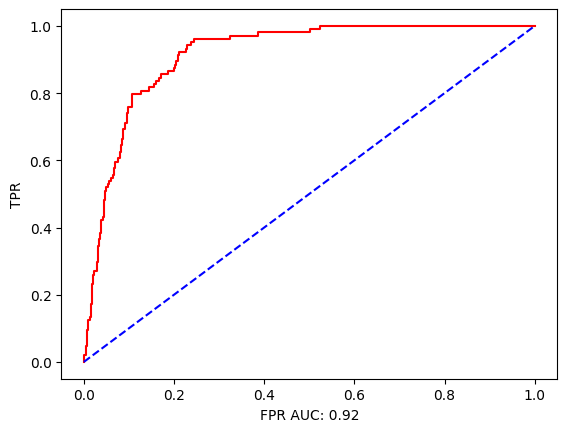

In [115]:
params = {'n_estimators':[300,600,900],'max_depth':[4,5,6,7],'criterion':['entropy','gini']}
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,
                   scoring='recall',verbose=3,cv=3)
gscv.fit(x_train,y_train)
rf=RandomForestClassifier(**gscv.best_params_)
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_rf.predict_proba(x_test)[:,1])

In [116]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 600}

confusion_matrix 
 [[779  22]
 [ 74  30]]
cohen_kappa_score 0.33355834432818876
accuracy 0.8939226519337017
recall 0.28846153846153844
auc_score 0.6304979352732162
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.58      0.29      0.38       104

    accuracy                           0.89       905
   macro avg       0.75      0.63      0.66       905
weighted avg       0.87      0.89      0.88       905



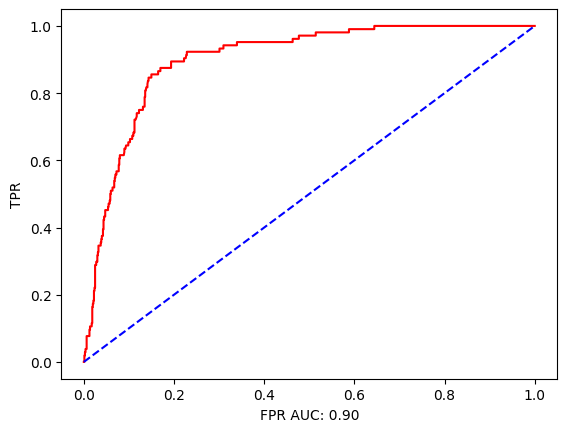

In [103]:
cat=CatBoostClassifier(class_weights='balanced')
model_ab=ab.fit(x_train,y_train)
y_pred_ab=model_ab.predict(x_test)
score(y_test,y_pred_ab)
roc(y_test,model_ab.predict_proba(x_test)[:,1])

In [106]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


confusion_matrix 
 [[648 153]
 [ 15  89]]
cohen_kappa_score 0.421447978264344
accuracy 0.8143646408839779
recall 0.8557692307692307
auc_score 0.8323789974070872
classification_report 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       801
           1       0.37      0.86      0.51       104

    accuracy                           0.81       905
   macro avg       0.67      0.83      0.70       905
weighted avg       0.91      0.81      0.84       905



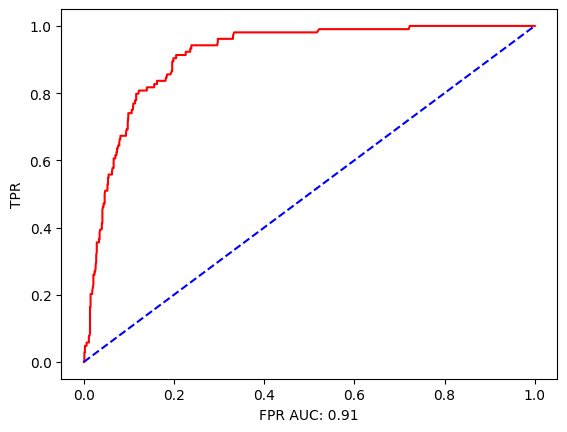

In [111]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier(n_estimators=1000)
model_brf=brf.fit(x_train,y_train)    #giving data where smote is not applied
y_pred_rf=model_brf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_brf.predict_proba(x_test)[:,1])

In [ ]:
# 1)Since in the evaluation metric it is given that AUC score is evaluation creteria used for the model 
# evaluation, so we build different models on the basis of AUC score and concluded that Random forests performs best among all other 
# models by giving 0.92 as AUC score.
# 2) AUC score basically tells positive and negatives partitioning
# 3)Higher the value of AUC score better is the model becuse model is able to partition well positive class from negative class.


# Limitation of the model:
# It gives good recall for 0 class that is for clients who doesn't churn the data but for 1 class it is providing less score 
# possible reason could be since data is baised after applying random forests it works on the principle of the random Bootstrap 
# sampling after sampling random for 1 class less training has been achieved by the example and for class 0 it's learning rate 
# is good due to the presence of ample amount of data.

In [117]:
# Possible Future work
# 1) We can  study what all schemes purchased by married people of house loan and personal loans as from the data it is clear that
# which could be a possible reason for their churning from company services.
# 2)poutcome of the previous outcome was failure for number of clients so we study qbout factors for their failure and can work on it
#3)Last service purchase by clients before their churn could be governing factor for what reason client has left the company services
#4)the unkown factor of poutcome is area of critical analysis, beacuse of which company has observed higher churned count 